# Feature Engineering

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the previously cleaned dataset

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Smart_grid/Data_with_date.csv')

In [ ]:
df1

,LCLid,KWH/hh (per half hour),Year,Month,Day,Hour,Minute
0,MAC004458,1.834,2012,8,30,14,30
1,MAC004458,1.428,2012,8,30,15,0
2,MAC004458,0.653,2012,8,30,15,30
3,MAC004458,0.490,2012,8,30,16,0
4,MAC004458,0.594,2012,8,30,16,30
...,...,...,...,...,...,...,...
14989290,MAC005007,0.048,2012,7,9,0,0
14989291,MAC005007,0.044,2012,7,9,0,30
14989292,MAC005007,0.039,2012,7,9,1,0
14989293,MAC005007,0.030,2012,7,9,1,30


## Number of smart meters per year


In [ ]:
nbr_compteur=df1['LCLid'].unique()
print('on a ', len(nbr_compteur), 'compteurs de notre dataset')

on a  448 compteurs de notre dataset


In [ ]:
print('On travaille dans les années',df1['Year'].unique())

On travaille dans les années [2012 2013 2014 2011]


In [ ]:
df_2011=df1[df1['Year']==2011]
df_2012=df1[df1['Year']==2012]
df_2013=df1[df1['Year']==2013]
df_2014=df1[df1['Year']==2014]

In [ ]:
nb_comp_2011=len(df_2011['LCLid'].unique())
nb_comp_2012=len(df_2012['LCLid'].unique())
nb_comp_2013=len(df_2013['LCLid'].unique())
nb_comp_2014=len(df_2014['LCLid'].unique())
print('En 2011 on a',nb_comp_2011,'compteurs','\n')
print('En 2012 on a',nb_comp_2012,'compteurs','\n')
print('En 2013 on a',nb_comp_2013,'compteurs','\n')
print('En 2014 on a',nb_comp_2014,'compteurs','\n')

En 2011 on a 133 compteurs 

En 2012 on a 448 compteurs 

En 2013 on a 445 compteurs 

En 2014 on a 407 compteurs 



Let's visualize the number of meters per year

Text(0.5, 1.0, 'Nombre de compteurs chaque année ')

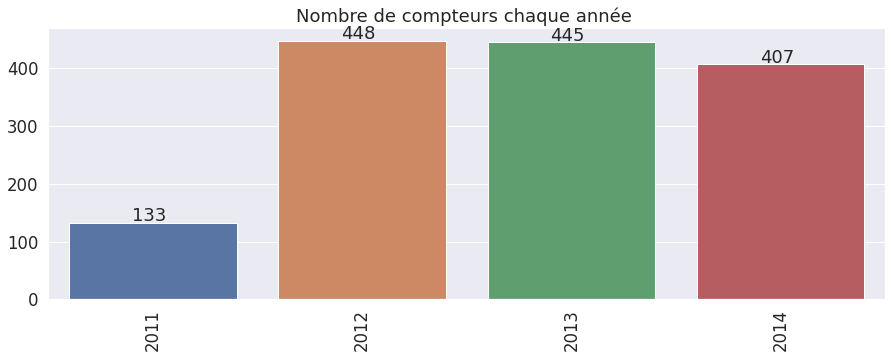

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
Year=[2011,2012,2013,2014]
Nb_comp_year=[nb_comp_2011,nb_comp_2012,nb_comp_2013,nb_comp_2014]
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)

g=sns.barplot(y=Nb_comp_year,x=Year)
for i, v in enumerate(Nb_comp_year):
    g.text(i-0.1, v+2, str(int(v)))
g=g.set_xticklabels(g.get_xticklabels(), rotation=90) 
plt.title('Nombre de compteurs chaque année ')


We can notice that in 2012 we have the bigest number of meters

We will now look for the number of meters for each month per year

In [ ]:
nb_comp_month_2011=[len(i) for i in df_2011.groupby('Month')['LCLid'].unique().values ]
nb_comp_month_2012=[len(i) for i in df_2012.groupby('Month')['LCLid'].unique().values]
nb_comp_month_2013=[len(i) for i in df_2013.groupby('Month')['LCLid'].unique().values]
nb_comp_month_2014=[len(i) for i in df_2014.groupby('Month')['LCLid'].unique().values]
print('en 2011 on a',nb_comp_month_2011,'compteurs','\n')
print('en 2012 on a',nb_comp_month_2012,'compteurs','\n')
print('en 2013 on a',nb_comp_month_2013,'compteurs','\n')
print('en 2014 on a',nb_comp_month_2014,'compteurs','\n')

en 2011 on a [133] compteurs 

en 2012 on a [250, 250, 254, 348, 348, 348, 445, 446, 447, 447, 447, 447] compteurs 

en 2013 on a [445, 443, 437, 436, 433, 432, 429, 423, 419, 416, 414, 407] compteurs 

en 2014 on a [407, 403] compteurs 



We create a dictionary with the name of each month


In [ ]:
Month_Names={1:'Janvier',2:'Février',3:'Mars',4:'Avril',5:'Mai',6:'Juin',7:'Juillet',8:'Aout',9:'Septembre',10:'Octobre',11:'Novembre',12:'Décembre'}

For 2011, we have data for only one month which is December


Text(0.5, 1.0, 'Nombre de compteur pour le mois de Décembre 2011 ')

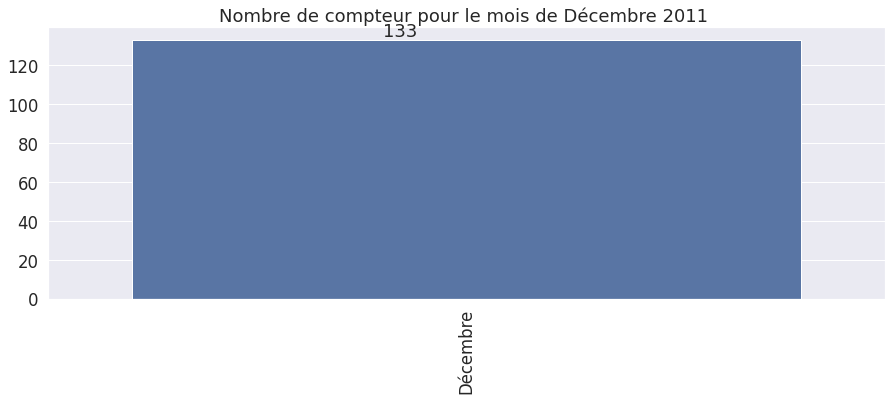

In [ ]:
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
g=sns.barplot(y=nb_comp_month_2011,x=[Month_Names[12]])
for i, v in enumerate(nb_comp_month_2011):
    g.text(i-0.1, v+2, str(int(v)))
g=g.set_xticklabels(g.get_xticklabels(), rotation=90) 
plt.title('Nombre de compteur pour le mois de Décembre 2011 ')

For 2012, we have data for the whole year

Text(0.5, 1.0, "Nombre de compteurs pour l'année 2012 ")

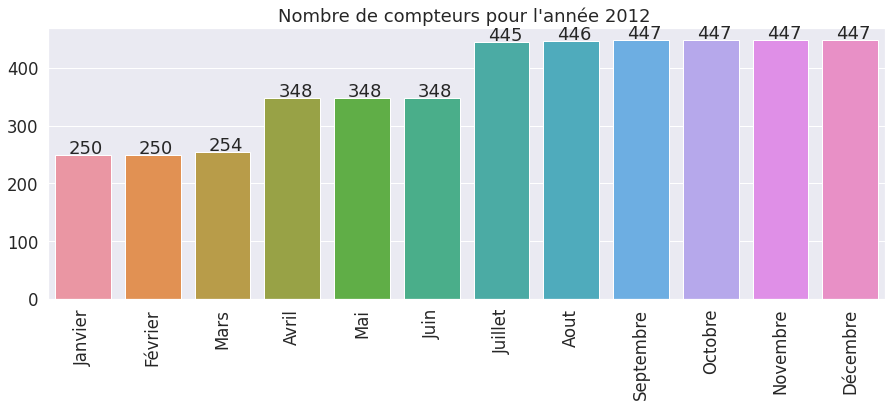

In [ ]:
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
g=sns.barplot(y=nb_comp_month_2012,x=list(Month_Names.values()))
for i, v in enumerate(nb_comp_month_2012):
    g.text(i-0.2, v+2, str(int(v)))
g=g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Nombre de compteurs pour l\'année 2012 ') 

For 2013, we have data for the whole year

Text(0.5, 1.0, "Nombre de compteurs pour l'année 2013 ")

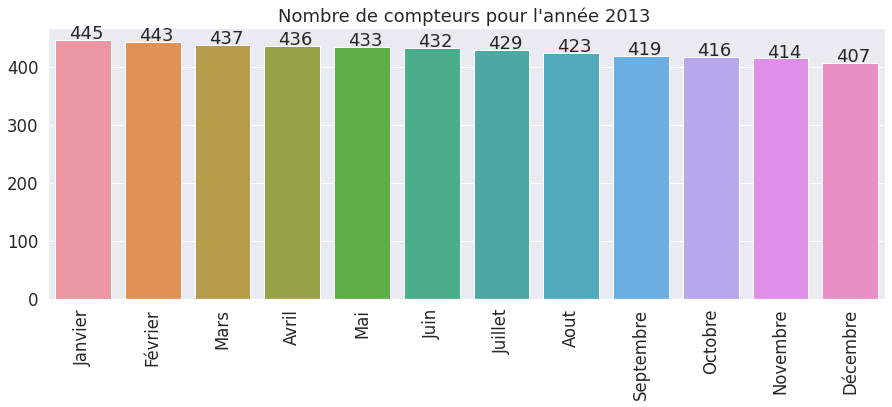

In [ ]:
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
g=sns.barplot(y=nb_comp_month_2013,x=list(Month_Names.values()))
for i, v in enumerate(nb_comp_month_2013):
    g.text(i-0.2, v+2, str(int(v)))
g=g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Nombre de compteurs pour l\'année 2013 ') 

For 2014, we have the data for the first two months which are January and February

Text(0.5, 1.0, "Nombre de compteurs pour les deux mois Janvier et Février de l'année 2014 ")

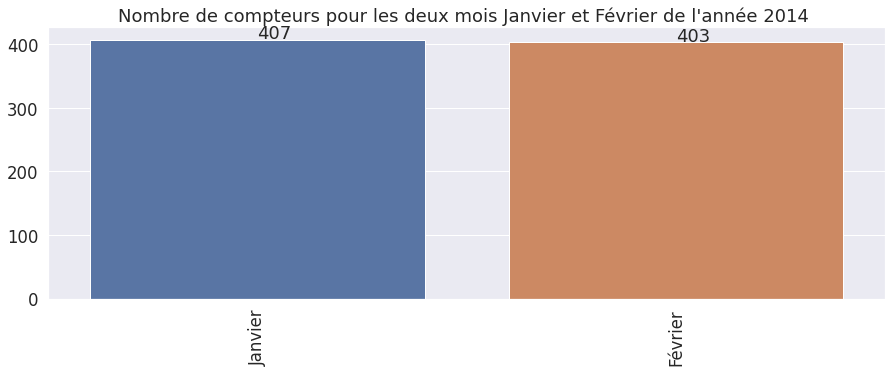

In [ ]:
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
g=sns.barplot(y=nb_comp_month_2014,x=[Month_Names[1],Month_Names[2]])
for i, v in enumerate(nb_comp_month_2014):
    g.text(i, v+2, str(int(v)))
g=g.set_xticklabels(g.get_xticklabels(), rotation=90) 
plt.title('Nombre de compteurs pour les deux mois Janvier et Février de l\'année 2014 ') 



## Average consumption

Now we are interested in the average consumption per year, per month, 
per day and then per period of the day for each meter.


### Year

In [ ]:
conso_moy_2011=df_2011.groupby('LCLid')['KWH/hh (per half hour) '].mean()
conso_moy_2012=df_2012.groupby('LCLid')['KWH/hh (per half hour) '].mean()
conso_moy_2013=df_2013.groupby('LCLid')['KWH/hh (per half hour) '].mean()
conso_moy_2014=df_2014.groupby('LCLid')['KWH/hh (per half hour) '].mean()

In [ ]:
conso_mo=[conso_moy_2011.mean(),conso_moy_2012.mean(),conso_moy_2013.mean(),conso_moy_2014.mean()]

Text(0.5, 1.0, 'Consommation moyenne pour chaque année')

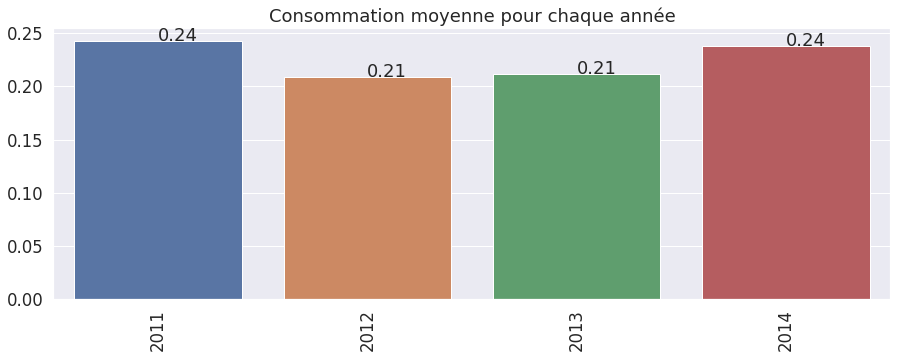

In [ ]:
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
years=[2011,2012,2013,2014]
g=sns.barplot(y=conso_mo,x=years)
for i,v in enumerate(conso_mo):
    g.text(i,v, str(round(v,2)))
g=g.set_xticklabels(g.get_xticklabels(), rotation=90) 
plt.title('Consommation moyenne pour chaque année')

The average consumption is greater in 2011 and 2014 since only one or two months of data are available.

These two months tend to be the months with the highest consumption.

Now for each year we will see the consumption for each month.

- Average consumption per meter in 2011

In [ ]:
conso_moy_2011.describe()

count    133.000000
mean       0.242800
std        0.157676
min        0.029893
25%        0.127355
50%        0.200878
75%        0.310748
max        0.923923
Name: KWH/hh (per half hour) , dtype: float64

- For the year 2011, we have only one month that December, for this month we have 133 meters, the average consumption of all meters is 0.242, the maximum average consumption per meter is 0.923 and the minimum average consumption per meter is 0.029.


We start by seeing the average consumption for the year 2011 per meter


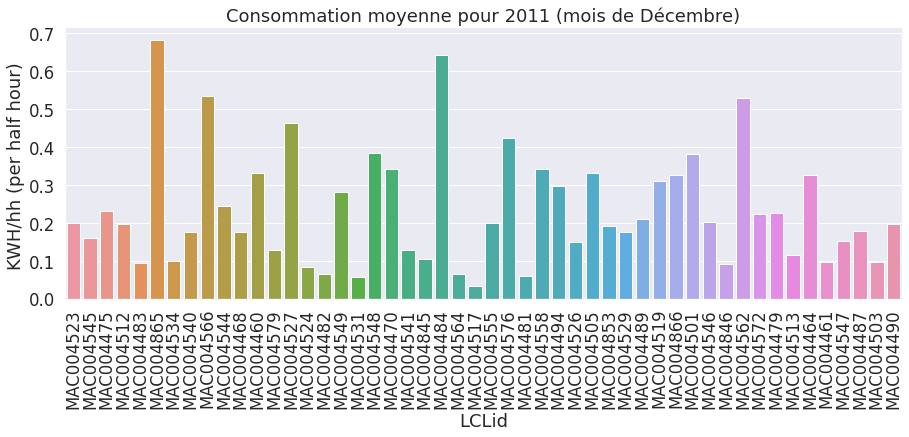

In [ ]:
#Since we have 133 meters, the visualization will not be understandable enough, so we will visualize a sample of 50 meters
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
conso_moy_2011_sample=conso_moy_2011.sample(50)
g=sns.barplot(y=conso_moy_2011_sample,x=conso_moy_2011_sample.index)
plt.title('Consommation moyenne pour 2011 (mois de Décembre)')
g=g.set_xticklabels(g.get_xticklabels(), rotation=90) 

In [ ]:
df_compteur=pd.DataFrame()
df_compteur['Compteur']=conso_moy_2011.index
df_compteur['consommation_moyenne_2011']=conso_moy_2011.values

In [ ]:
df_compteur

,Compteur,consommation_moyenne_2011
0,MAC004459,0.456473
1,MAC004460,0.330258
2,MAC004461,0.097312
3,MAC004462,0.237251
4,MAC004463,0.145408
...,...,...
128,MAC004863,0.232368
129,MAC004864,0.170680
130,MAC004865,0.683622
131,MAC004866,0.327563


- Average consumption per meter in 2012


In [ ]:
conso_moy_2012.describe()

count    448.000000
mean       0.208560
std        0.149203
min        0.000003
25%        0.111348
50%        0.164258
75%        0.271729
max        1.376270
Name: KWH/hh (per half hour) , dtype: float64

- For the year 2012, we have data for 12 months. For this year, we have 448 meters, the average consumption of all meters is 0.208, the maximum average consumption per meter is 1.376 and the minimum average consumption per meter is 0.000.


We start by seeing the average consumption for the year 2012 per meter

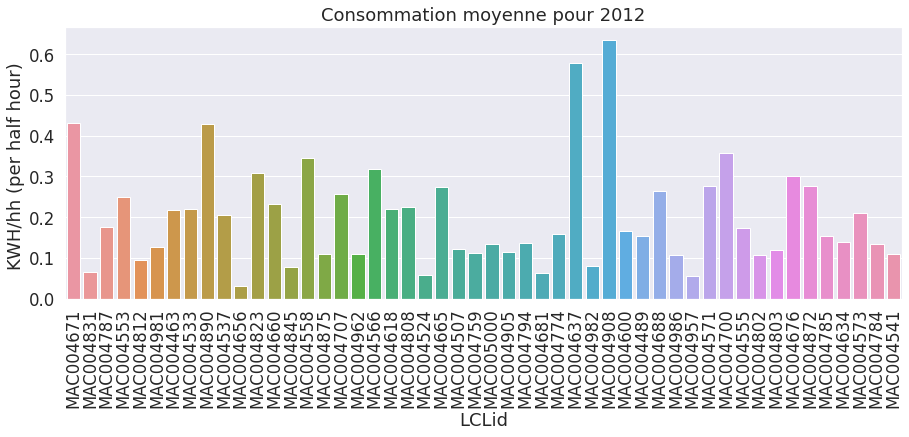

In [ ]:
#Since we have 448 meters, the visualization will not be understandable enough, so we will visualize a sample of 50 meters
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
conso_moy_2012_sample=conso_moy_2012.sample(50)
g=sns.barplot(y=conso_moy_2012_sample,x=conso_moy_2012_sample.index)
plt.title('Consommation moyenne pour 2012')

g=g.set_xticklabels(g.get_xticklabels(), rotation=90) 

In [ ]:
df1_compteur=pd.DataFrame()
df1_compteur['Compteur']=conso_moy_2012.index
df1_compteur['consommation_moyenne_2012']=conso_moy_2012.values

df_compteur=pd.merge(df_compteur,df1_compteur,on='Compteur',how='outer')
df_compteur['consommation_moyenne_2011']=df_compteur['consommation_moyenne_2011'].fillna(0)# we replace the missing values with 0, since 0 consumption indicates that the meter does not exist
df_compteur

,Compteur,consommation_moyenne_2011,consommation_moyenne_2012
0,MAC004459,0.456473,0.411864
1,MAC004460,0.330258,0.228031
2,MAC004461,0.097312,0.105042
3,MAC004462,0.237251,0.236806
4,MAC004463,0.145408,0.216300
...,...,...,...
443,MAC005002,0.000000,0.114711
444,MAC005003,0.000000,0.104788
445,MAC005004,0.000000,0.068051
446,MAC005005,0.000000,0.150806


- Average consumption per meter in 2013




In [ ]:
conso_moy_2013.describe()

count    445.000000
mean       0.211626
std        0.146011
min        0.000041
25%        0.112432
50%        0.167957
75%        0.274923
max        0.894962
Name: KWH/hh (per half hour) , dtype: float64

- For the year 2013, we have data for 12 months. For this year, we have 448 meters, the average consumption of all meters is 0.211, the maximum average consumption per meter is 0.895 and the minimum average consumption per meter is 0.000.


We start by seeing the average consumption for the year 2013 per meter

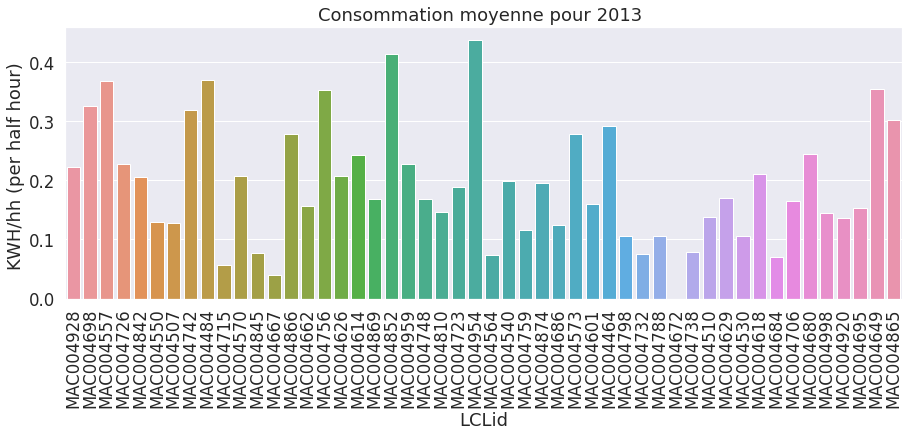

In [ ]:
#Since we have 445 meters, the visualization will not be understandable enough, so we will visualize a sample of 50 meters
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
conso_moy_2013_sample=conso_moy_2013.sample(50)
g=sns.barplot(y=conso_moy_2013_sample,x=conso_moy_2013_sample.index)
plt.title('Consommation moyenne pour 2013 ')

g=g.set_xticklabels(g.get_xticklabels(), rotation=90) 

In [ ]:
df1_compteur=pd.DataFrame()
df1_compteur['Compteur']=conso_moy_2013.index
df1_compteur['consommation_moyenne_2013']=conso_moy_2013.values

df_compteur=pd.merge(df_compteur,df1_compteur,on='Compteur',how='outer')
df_compteur['consommation_moyenne_2013']=df_compteur['consommation_moyenne_2013'].fillna(0)
df_compteur

,Compteur,consommation_moyenne_2011,consommation_moyenne_2012,consommation_moyenne_2013
0,MAC004459,0.456473,0.411864,0.379895
1,MAC004460,0.330258,0.228031,0.214951
2,MAC004461,0.097312,0.105042,0.097221
3,MAC004462,0.237251,0.236806,0.250876
4,MAC004463,0.145408,0.216300,0.217657
...,...,...,...,...
443,MAC005002,0.000000,0.114711,0.168397
444,MAC005003,0.000000,0.104788,0.121901
445,MAC005004,0.000000,0.068051,0.061210
446,MAC005005,0.000000,0.150806,0.150928


- Average consumption per meter in 2014



In [ ]:
conso_moy_2014.describe()

count    407.000000
mean       0.237487
std        0.190239
min        0.000000
25%        0.118308
50%        0.181961
75%        0.286252
max        1.279239
Name: KWH/hh (per half hour) , dtype: float64

- For the year 2014, we have data for 2 months. 

For this year, we have 407 meters, the average consumption of all meters is 0.237, the maximum average consumption per meter is 1.279 and the minimum average consumption per meter is 0.000.

We start by seeing the average consumption for the year 2014 by meter

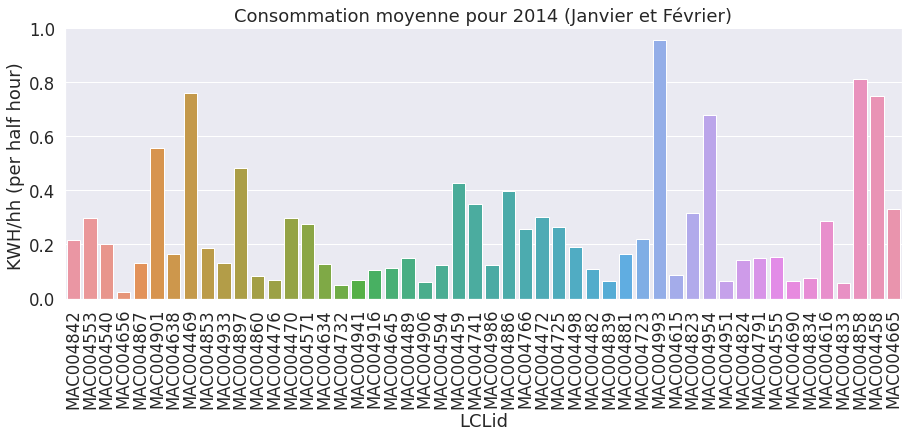

In [ ]:
#Since we have 407 meters, the visualization will not be understandable enough, so we will visualize a sample of 50 meters
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
conso_moy_2014_sample=conso_moy_2014.sample(50)
g=sns.barplot(y=conso_moy_2014_sample,x=conso_moy_2014_sample.index)
plt.title('Consommation moyenne pour 2014 (Janvier et Février)')

g=g.set_xticklabels(g.get_xticklabels(), rotation=90) 

In [ ]:
df1_compteur=pd.DataFrame()
df1_compteur['Compteur']=conso_moy_2014.index
df1_compteur['consommation_moyenne_2014']=conso_moy_2014.values

df_compteur=pd.merge(df_compteur,df1_compteur,on='Compteur',how='outer')
df_compteur['consommation_moyenne_2014']=df_compteur['consommation_moyenne_2014'].fillna(0)
df_compteur

,Compteur,consommation_moyenne_2011,consommation_moyenne_2012,consommation_moyenne_2013,consommation_moyenne_2014
0,MAC004459,0.456473,0.411864,0.379895,0.428417
1,MAC004460,0.330258,0.228031,0.214951,0.196139
2,MAC004461,0.097312,0.105042,0.097221,0.144438
3,MAC004462,0.237251,0.236806,0.250876,0.316051
4,MAC004463,0.145408,0.216300,0.217657,0.250558
...,...,...,...,...,...
443,MAC005002,0.000000,0.114711,0.168397,0.249779
444,MAC005003,0.000000,0.104788,0.121901,0.136524
445,MAC005004,0.000000,0.068051,0.061210,0.074506
446,MAC005005,0.000000,0.150806,0.150928,0.174480


Now we are going to calculate the average of consumption per year 

In [ ]:
df_compteur['consommation_moyenne_par_an']=(df_compteur['consommation_moyenne_2012']+df_compteur['consommation_moyenne_2013'])/2

In [ ]:
df_compteur

,Compteur,consommation_moyenne_2011,consommation_moyenne_2012,consommation_moyenne_2013,consommation_moyenne_2014,consommation_moyenne_par_an
0,MAC004459,0.456473,0.411864,0.379895,0.428417,0.395879
1,MAC004460,0.330258,0.228031,0.214951,0.196139,0.221491
2,MAC004461,0.097312,0.105042,0.097221,0.144438,0.101131
3,MAC004462,0.237251,0.236806,0.250876,0.316051,0.243841
4,MAC004463,0.145408,0.216300,0.217657,0.250558,0.216979
...,...,...,...,...,...,...
443,MAC005002,0.000000,0.114711,0.168397,0.249779,0.141554
444,MAC005003,0.000000,0.104788,0.121901,0.136524,0.113345
445,MAC005004,0.000000,0.068051,0.061210,0.074506,0.064631
446,MAC005005,0.000000,0.150806,0.150928,0.174480,0.150867


### Mois

In [ ]:
conso_moy_2012_mois=df_2012.groupby(['LCLid','Month'])['KWH/hh (per half hour) '].mean()
conso_moy_2013_mois=df_2013.groupby(['LCLid','Month'])['KWH/hh (per half hour) '].mean()
conso_moy_2014_mois=df_2014.groupby(['LCLid','Month'])['KWH/hh (per half hour) '].mean()

- For the year 2011, we have already seen the month of December.

- Janvier 2012

In [ ]:
m={1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[]}
for i,j in conso_moy_2012_mois.index:
  m[j].append(i)
#We obtain a dictionary which contains meters for each month 


- Average consumption per meter in January 2012





In [ ]:
c_j=[]
for i in m[1]:
 c_j.append(conso_moy_2012_mois[(i,1)])
cons_j=pd.DataFrame()
cons_j['Compteur']=m[1]
cons_j['consommation_moyenne_janvier']=c_j
cons_j

,Compteur,consommation_moyenne_janvier
0,MAC004459,0.495474
1,MAC004460,0.228910
2,MAC004461,0.099985
3,MAC004462,0.244229
4,MAC004463,0.222792
...,...,...
245,MAC005002,0.162720
246,MAC005003,0.118612
247,MAC005004,0.072764
248,MAC005005,0.238040


In [ ]:
cons_j.describe()

,consommation_moyenne_janvier
count,250.000000
mean,0.280621
std,0.222978
min,0.015465
25%,0.139987
50%,0.210143
75%,0.348557
max,1.897868


- For January of the year 2012, We have 250 meters, the average consumption of all meters is 0.280, the maximum average consumption per meter is 1.897 and the minimum average consumption per meter is 0.015.

We start by seeing the average consumption for January of the year 2012 
by meter

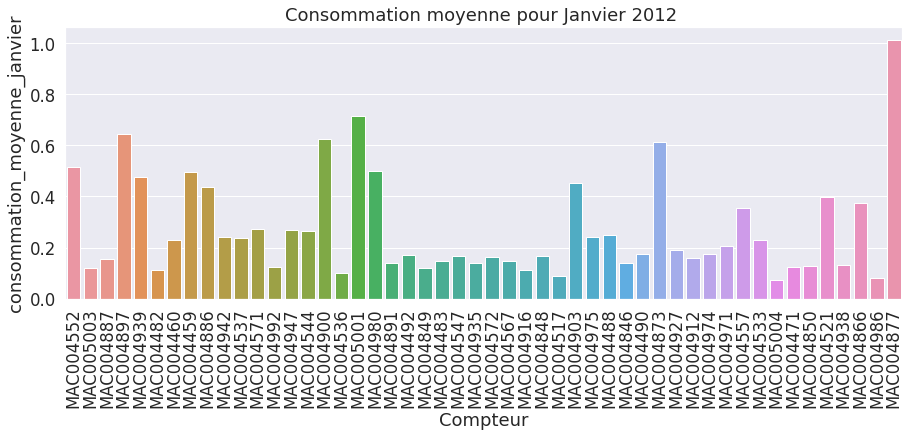

In [ ]:
#Since we have 250 meters, the visualization will not be understandable enough, so we will visualize a sample of 50 meters
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
cons_j_sample=cons_j.sample(50)
g=sns.barplot(y=cons_j_sample['consommation_moyenne_janvier'],x=cons_j_sample['Compteur'])
plt.title('Consommation moyenne pour Janvier 2012 ')

g=g.set_xticklabels(g.get_xticklabels(), rotation=90) 

- July 2012

In [ ]:
c_ju=[]
for i in m[7]:
 c_ju.append(conso_moy_2012_mois[(i,7)])
cons_ju=pd.DataFrame()
cons_ju['Compteur']=m[7]
cons_ju['consommation_moyenne_juillet']=c_ju
cons_ju

,Compteur,consommation_moyenne_juillet
0,MAC004459,0.344458
1,MAC004460,0.205942
2,MAC004461,0.122096
3,MAC004462,0.195599
4,MAC004463,0.218922
...,...,...
440,MAC005002,0.101061
441,MAC005003,0.084378
442,MAC005004,0.061526
443,MAC005005,0.128321


- Average consumption per meter in July 2012


In [ ]:
cons_ju.describe()

,consommation_moyenne_juillet
count,445.000000
mean,0.168755
std,0.108036
min,0.000000
25%,0.092565
50%,0.140824
75%,0.216037
max,0.669780


- For July of the year 2012. We have 445 meters, the average consumption of all meters is 0.168, the maximum average consumption per meter is 0.669 and the minimum average consumption per meter is 0.000.
- Even though the number of meters has increased, the average consumption of all meters and the maximum have decreased in July.

visualization of the the average consumption for July of the year 2012 


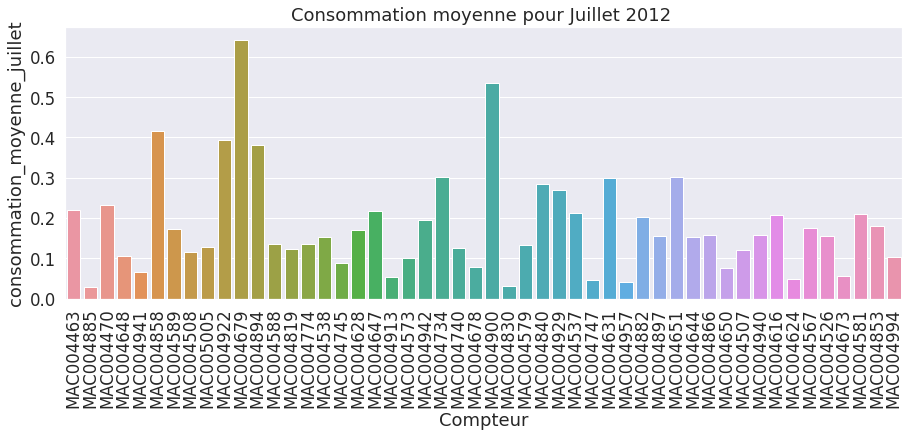

In [ ]:
#Since we have 445 meters, the visualization will not be understandable enough, so we will visualize a sample of 50 meters
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
cons_ju_sample=cons_ju.sample(50)
g=sns.barplot(y=cons_ju_sample['consommation_moyenne_juillet'],x=cons_ju_sample['Compteur'])
plt.title('Consommation moyenne pour Juillet 2012 ')

g=g.set_xticklabels(g.get_xticklabels(), rotation=90) 

- September 2012

In [ ]:
c_s=[]
for i in m[9]:
 c_s.append(conso_moy_2012_mois[(i,9)])
cons_s=pd.DataFrame()
cons_s['Compteur']=m[9]
cons_s['consommation_moyenne_septembre']=c_s
cons_s

,Compteur,consommation_moyenne_septembre
0,MAC004458,0.546697
1,MAC004459,0.333824
2,MAC004460,0.228108
3,MAC004461,0.110724
4,MAC004462,0.281233
...,...,...
442,MAC005001,0.476706
443,MAC005002,0.106011
444,MAC005003,0.093420
445,MAC005004,0.067403


- Average consumption per meter in September 2012





In [ ]:
cons_s.describe()

,consommation_moyenne_septembre
count,447.000000
mean,0.180864
std,0.125487
min,0.000000
25%,0.101802
50%,0.148126
75%,0.231581
max,1.014885


- For September of the year 2012. We have 447 meters, the average consumption of all meters is 0.180, the maximum average consumption per meter is 1.015 and the minimum average consumption per meter is 0.000.
- Compared to January,the number of meters has increased, which has caused a slight increase in the average values of all meters and the maximum average consumption per meter.



 Average consumption for September of the year 2012 by meter visualization

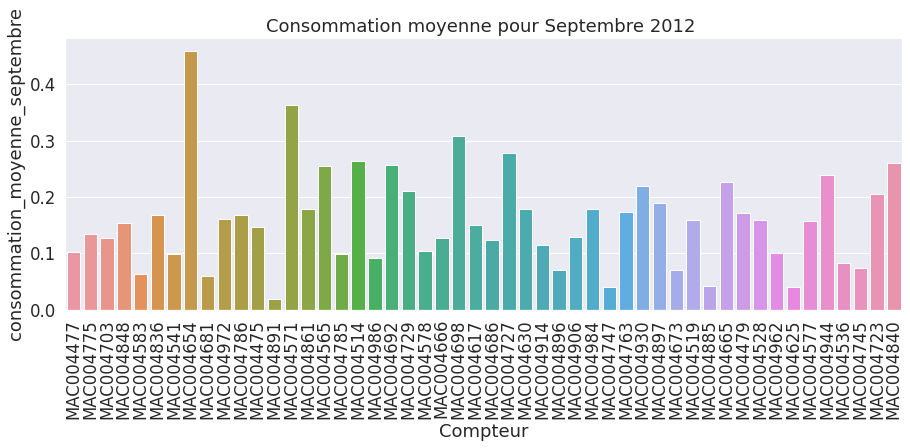

In [ ]:
#Since we have 447 meters, the visualization will not be understandable enough, so we will visualize a sample of 50 meters
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
cons_s_sample=cons_s.sample(50)
g=sns.barplot(y=cons_s_sample['consommation_moyenne_septembre'],x=cons_s_sample['Compteur'])
plt.title('Consommation moyenne pour Septembre 2012 ')

g=g.set_xticklabels(g.get_xticklabels(), rotation=90) 

We need to calculate the average consumption of each meter per month  for the year 2012

In [ ]:
month_cons=pd.DataFrame()
c_fe=[]
for i in m[1]:
  c_fe.append(conso_moy_2012_mois[(i,1)])
cons_fe=pd.DataFrame()
cons_fe['Compteur']=m[1]
cons_fe['consommation_moyenne_'+str(Month_Names[1])]=c_fe
month_cons=cons_fe
for j in range(2,13):
 c_fe=[]
 for i in m[j]:
  c_fe.append(conso_moy_2012_mois[(i,j)])
 cons_fe=pd.DataFrame()
 cons_fe['Compteur']=m[j]
 cons_fe['consommation_moyenne_'+str(Month_Names[j])]=c_fe
 month_cons=pd.merge(month_cons,cons_fe,on='Compteur',how='outer')
month_cons

,Compteur,consommation_moyenne_Janvier,consommation_moyenne_Février,consommation_moyenne_Mars,consommation_moyenne_Avril,consommation_moyenne_Mai,consommation_moyenne_Juin,consommation_moyenne_Juillet,consommation_moyenne_Aout,consommation_moyenne_Septembre,consommation_moyenne_Octobre,consommation_moyenne_Novembre,consommation_moyenne_Décembre
0,MAC004459,0.495474,0.522987,0.410585,0.395820,0.376232,0.325337,0.344458,0.341366,0.333824,0.399468,0.474856,0.525328
1,MAC004460,0.228910,0.203455,0.236172,0.223215,0.237473,0.239029,0.205942,0.197867,0.228108,0.237296,0.240199,0.257722
2,MAC004461,0.099985,0.101108,0.097470,0.107214,0.112614,0.117844,0.122096,0.099090,0.110724,0.103856,0.094628,0.093948
3,MAC004462,0.244229,0.314658,0.202620,0.196283,0.214570,0.243696,0.195599,0.200635,0.281233,0.256558,0.232256,0.264540
4,MAC004463,0.222792,0.231046,0.206265,0.217108,0.230835,0.216959,0.218922,0.213720,0.162801,0.224587,0.223956,0.226131
...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,MAC004712,NaN,NaN,NaN,NaN,NaN,NaN,0.262368,0.402240,0.405245,0.457853,0.460576,0.519958
444,MAC004973,NaN,NaN,NaN,NaN,NaN,NaN,0.099247,0.096250,0.079584,0.046629,0.033659,0.036858
445,MAC004458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.603970,0.546697,0.637046,0.738482,0.908771
446,MAC004823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.243847,0.268801,0.316424,0.355140,0.353859


In [ ]:
month_cons=month_cons.fillna(0)#we will replace NaN values by 0, since NaN refers to unexcisting meter

Visualisation of the evolution of the average consumption of a random meter in 2012

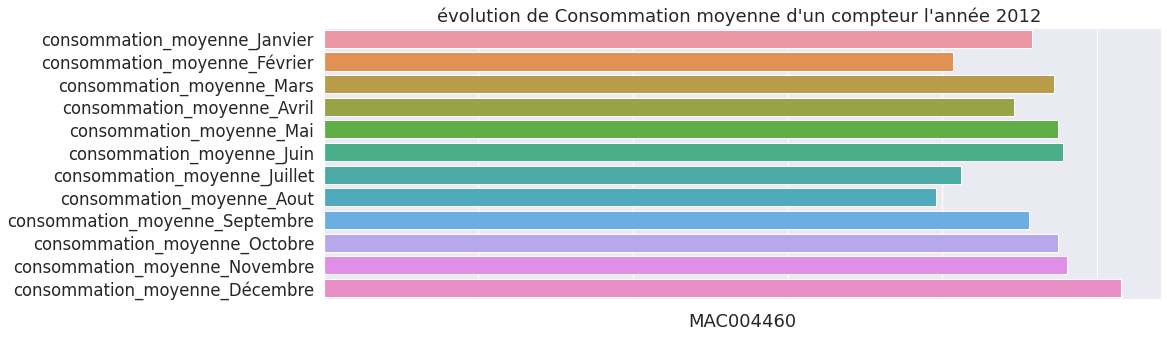

In [ ]:
pivoted = month_cons.transpose()
pivoted = pivoted.rename(columns=month_cons['Compteur'])
pivoted = pivoted.drop(pivoted.index[0])
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)

g=sns.barplot(y=pivoted[pivoted.columns[1]].index,x=pivoted[pivoted.columns[1]])
plt.title('évolution de Consommation moyenne d\'un compteur l\'année 2012 ')

g=g.set_xticklabels(g.get_xticklabels(), rotation=90) 

- We can notice that the minimum consumption for the meter 'MAC004460' is in August and the maximum consumption is in Decemeber

- Now we are going to calculate the average of consumption per month for each meter

In [ ]:
month_cons['moyenne_consommation_par_mois']=month_cons.mean(axis=1)
month_cons

<ipython-input-48-8fc3ea046367>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  month_cons['moyenne_consommation_par_mois']=month_cons.mean(axis=1)


,Compteur,consommation_moyenne_Janvier,consommation_moyenne_Février,consommation_moyenne_Mars,consommation_moyenne_Avril,consommation_moyenne_Mai,consommation_moyenne_Juin,consommation_moyenne_Juillet,consommation_moyenne_Aout,consommation_moyenne_Septembre,consommation_moyenne_Octobre,consommation_moyenne_Novembre,consommation_moyenne_Décembre,moyenne_consommation_par_mois
0,MAC004459,0.495474,0.522987,0.410585,0.395820,0.376232,0.325337,0.344458,0.341366,0.333824,0.399468,0.474856,0.525328,0.412145
1,MAC004460,0.228910,0.203455,0.236172,0.223215,0.237473,0.239029,0.205942,0.197867,0.228108,0.237296,0.240199,0.257722,0.227949
2,MAC004461,0.099985,0.101108,0.097470,0.107214,0.112614,0.117844,0.122096,0.099090,0.110724,0.103856,0.094628,0.093948,0.105048
3,MAC004462,0.244229,0.314658,0.202620,0.196283,0.214570,0.243696,0.195599,0.200635,0.281233,0.256558,0.232256,0.264540,0.237240
4,MAC004463,0.222792,0.231046,0.206265,0.217108,0.230835,0.216959,0.218922,0.213720,0.162801,0.224587,0.223956,0.226131,0.216260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,MAC004712,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.262368,0.402240,0.405245,0.457853,0.460576,0.519958,0.209020
444,MAC004973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099247,0.096250,0.079584,0.046629,0.033659,0.036858,0.032686
445,MAC004458,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.603970,0.546697,0.637046,0.738482,0.908771,0.286247
446,MAC004823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.243847,0.268801,0.316424,0.355140,0.353859,0.128173


In [ ]:
#we add the new column ' moyenne_consommation_par mois' to the dataset that we are going to use in the clustering phase
df_compteur=pd.merge(df_compteur,month_cons[['Compteur','moyenne_consommation_par_mois']],on='Compteur',how='outer')
df_compteur

,Compteur,consommation_moyenne_2011,consommation_moyenne_2012,consommation_moyenne_2013,consommation_moyenne_2014,consommation_moyenne_par_an,moyenne_consommation_par_mois
0,MAC004459,0.456473,0.411864,0.379895,0.428417,0.395879,0.412145
1,MAC004460,0.330258,0.228031,0.214951,0.196139,0.221491,0.227949
2,MAC004461,0.097312,0.105042,0.097221,0.144438,0.101131,0.105048
3,MAC004462,0.237251,0.236806,0.250876,0.316051,0.243841,0.237240
4,MAC004463,0.145408,0.216300,0.217657,0.250558,0.216979,0.216260
...,...,...,...,...,...,...,...
443,MAC005002,0.000000,0.114711,0.168397,0.249779,0.141554,0.118111
444,MAC005003,0.000000,0.104788,0.121901,0.136524,0.113345,0.105798
445,MAC005004,0.000000,0.068051,0.061210,0.074506,0.064631,0.068431
446,MAC005005,0.000000,0.150806,0.150928,0.174480,0.150867,0.157344


### Day


We start by defining a dictionary containing each day with its order in the week to determine the days of the week for each date 

In [ ]:
week_days={1:'Lundi',2:'Mardi',3:'Mercredi',4:'Jeudi',5:'Vendredi',6:'Samedi',7:'Dimanche'}

We are going to focus on the year 2012

In [ ]:
conso_moy_2012_mois=df_2012.groupby(['LCLid','Month'])['KWH/hh (per half hour) '].mean()


We start by January

In [ ]:
conso_by_2012_by_month_by_day=df_2012[df_2012['Month']==1].groupby(['Day','LCLid'])['KWH/hh (per half hour) '].mean()
conso_by_2012_by_month_by_day

Day  LCLid    
1    MAC004459    0.204479
     MAC004460    0.266458
     MAC004461    0.129583
     MAC004462    0.204000
     MAC004463    0.088667
                    ...   
31   MAC005002    0.113854
     MAC005003    0.094833
     MAC005004    0.064292
     MAC005005    0.133708
     MAC005007    0.091687
Name: KWH/hh (per half hour) , Length: 5635, dtype: float64

In [ ]:
from datetime import date
jo={1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[],13:[],14:[],15:[],16:[],17:[],18:[],19:[],20:[],21:[],22:[],23:[],24:[],25:[],26:[],27:[],28:[],29:[],30:[],31:[]}
daily_cons=pd.DataFrame()
c_fe=[]
jour_janv=[]
for i,j in conso_by_2012_by_month_by_day.index:
  jo[i].append(j)
  jour_janv.append(week_days[date(2012, 1, i).isoweekday()])
for i in jo[1]:
  c_fe.append(conso_by_2012_by_month_by_day[(1,i)])
cons_fe=pd.DataFrame()
cons_fe['Compteur']=jo[1]
cons_fe['consommation_moyenne_jour_'+str(week_days[date(2012, 1, 1).isoweekday()])+str(1)]=c_fe
daily_cons=cons_fe
for j in range(2,32):
 c_fe=[]
 
 for i in jo[j]:
  c_fe.append(conso_by_2012_by_month_by_day[(j,i)])
 cons_fe=pd.DataFrame()
 cons_fe['Compteur']=jo[j]
 cons_fe['consommation_moyenne_jour_'+str(week_days[date(2012, 1, j).isoweekday()])+str(j)]=c_fe
 daily_cons=pd.merge(daily_cons,cons_fe,on='Compteur',how='outer')
daily_cons=daily_cons.fillna(0)
daily_cons


,Compteur,consommation_moyenne_jour_Dimanche1,consommation_moyenne_jour_Lundi2,consommation_moyenne_jour_Mardi3,consommation_moyenne_jour_Mercredi4,consommation_moyenne_jour_Jeudi5,consommation_moyenne_jour_Vendredi6,consommation_moyenne_jour_Samedi7,consommation_moyenne_jour_Dimanche8,consommation_moyenne_jour_Lundi9,...,consommation_moyenne_jour_Dimanche22,consommation_moyenne_jour_Lundi23,consommation_moyenne_jour_Mardi24,consommation_moyenne_jour_Mercredi25,consommation_moyenne_jour_Jeudi26,consommation_moyenne_jour_Vendredi27,consommation_moyenne_jour_Samedi28,consommation_moyenne_jour_Dimanche29,consommation_moyenne_jour_Lundi30,consommation_moyenne_jour_Mardi31
0,MAC004459,0.204479,0.534646,0.458229,0.495542,0.539729,0.424313,0.312062,0.454104,0.701333,...,0.539229,0.321000,0.478583,0.395000,0.527583,0.383563,0.389375,0.678771,0.460771,0.597208
1,MAC004460,0.266458,0.324271,0.293271,0.194417,0.218896,0.177000,0.187250,0.348375,0.239979,...,0.272292,0.188250,0.228958,0.187583,0.222187,0.185021,0.250021,0.216854,0.239854,0.192187
2,MAC004461,0.129583,0.098458,0.086479,0.078625,0.079312,0.075375,0.086479,0.116729,0.086208,...,0.158146,0.085812,0.097521,0.109021,0.107833,0.083375,0.091792,0.132458,0.092542,0.090958
3,MAC004462,0.204000,0.225188,0.198833,0.208313,0.228313,0.363771,0.230437,0.194312,0.205792,...,0.220146,0.214125,0.191896,0.266521,0.258937,0.186292,0.227354,0.262979,0.524146,0.671979
4,MAC004463,0.088667,0.128292,0.418729,0.176896,0.173479,0.168458,0.219688,0.320583,0.324292,...,0.307896,0.260896,0.352562,0.274208,0.159167,0.182750,0.172250,0.198750,0.155688,0.179958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,MAC005002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.223632,0.256292,0.104604,0.152021,0.113854
246,MAC005003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.198643,0.120063,0.112417,0.123792,0.094833
247,MAC005004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.138733,0.057083,0.055688,0.064292
248,MAC005005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.346367,0.284979,0.227729,0.133708


Visualisation of the evolution of the average consumption of a random meter in 2012 per week

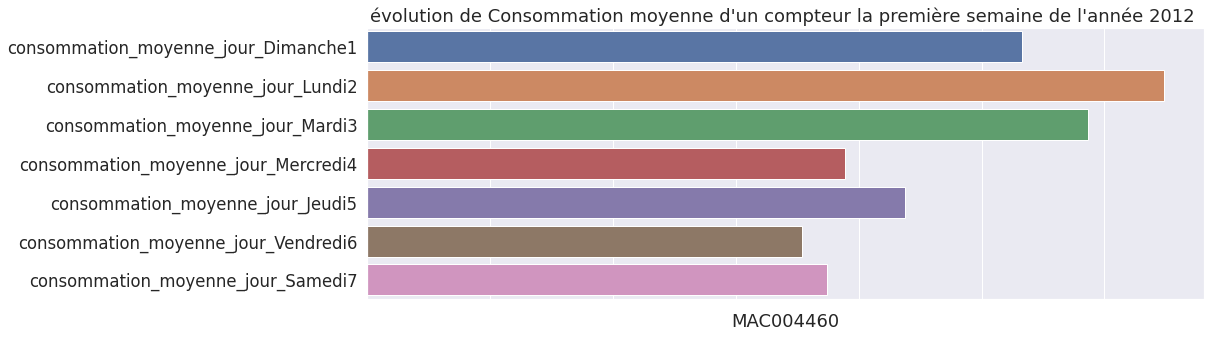

In [ ]:
pivoted = daily_cons.transpose()
pivoted = pivoted.rename(columns=month_cons['Compteur'])
pivoted = pivoted.drop(pivoted.index[0])
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
sem=pivoted[pivoted.columns[1]][:7]

g=sns.barplot(y=sem.index,x=pivoted[pivoted.columns[1]][:7])
plt.title('évolution de Consommation moyenne d\'un compteur la première semaine de l\'année 2012 ')

g=g.set_xticklabels(g.get_xticklabels(), rotation=90) 

For the meter 'MAC004460', the maximum of consumption is at Monday and the minimum consumption is at Friday

We calculate the average consumption for each day of January

In [ ]:

daily_cons['moyenne_consommation_par_jour_2012_Janvier']=daily_cons.mean(axis=1)
daily_cons

<ipython-input-55-be0ba6649457>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  daily_cons['moyenne_consommation_par_jour_2012_Janvier']=daily_cons.mean(axis=1)


,Compteur,consommation_moyenne_jour_Dimanche1,consommation_moyenne_jour_Lundi2,consommation_moyenne_jour_Mardi3,consommation_moyenne_jour_Mercredi4,consommation_moyenne_jour_Jeudi5,consommation_moyenne_jour_Vendredi6,consommation_moyenne_jour_Samedi7,consommation_moyenne_jour_Dimanche8,consommation_moyenne_jour_Lundi9,...,consommation_moyenne_jour_Lundi23,consommation_moyenne_jour_Mardi24,consommation_moyenne_jour_Mercredi25,consommation_moyenne_jour_Jeudi26,consommation_moyenne_jour_Vendredi27,consommation_moyenne_jour_Samedi28,consommation_moyenne_jour_Dimanche29,consommation_moyenne_jour_Lundi30,consommation_moyenne_jour_Mardi31,moyenne_consommation_par_jour_2012_Janvier
0,MAC004459,0.204479,0.534646,0.458229,0.495542,0.539729,0.424313,0.312062,0.454104,0.701333,...,0.321000,0.478583,0.395000,0.527583,0.383563,0.389375,0.678771,0.460771,0.597208,0.495474
1,MAC004460,0.266458,0.324271,0.293271,0.194417,0.218896,0.177000,0.187250,0.348375,0.239979,...,0.188250,0.228958,0.187583,0.222187,0.185021,0.250021,0.216854,0.239854,0.192187,0.228910
2,MAC004461,0.129583,0.098458,0.086479,0.078625,0.079312,0.075375,0.086479,0.116729,0.086208,...,0.085812,0.097521,0.109021,0.107833,0.083375,0.091792,0.132458,0.092542,0.090958,0.099985
3,MAC004462,0.204000,0.225188,0.198833,0.208313,0.228313,0.363771,0.230437,0.194312,0.205792,...,0.214125,0.191896,0.266521,0.258937,0.186292,0.227354,0.262979,0.524146,0.671979,0.244229
4,MAC004463,0.088667,0.128292,0.418729,0.176896,0.173479,0.168458,0.219688,0.320583,0.324292,...,0.260896,0.352562,0.274208,0.159167,0.182750,0.172250,0.198750,0.155688,0.179958,0.222792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,MAC005002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.223632,0.256292,0.104604,0.152021,0.113854,0.027432
246,MAC005003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.198643,0.120063,0.112417,0.123792,0.094833,0.020960
247,MAC005004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.138733,0.057083,0.055688,0.064292,0.010187
248,MAC005005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.346367,0.284979,0.227729,0.133708,0.032025


Calculation of average consumption in January for a Sunday and for a Monday

In [ ]:
col_lun=[]
col_dim=[]
for i in daily_cons.columns:
  if 'Lundi' in i:
    col_lun.append(i)
  elif 'Dimanche' in i:
    col_dim.append(i)
daily_cons_lun=daily_cons[col_lun]
daily_cons_dim=daily_cons[col_dim]

In [ ]:
daily_cons['moyenne_conso_lundi_janiver_2012']=daily_cons_lun.mean(axis=1)
daily_cons['moyenne_conso_dimanche_janiver_2012']=daily_cons_dim.mean(axis=1)
daily_cons

,Compteur,consommation_moyenne_jour_Dimanche1,consommation_moyenne_jour_Lundi2,consommation_moyenne_jour_Mardi3,consommation_moyenne_jour_Mercredi4,consommation_moyenne_jour_Jeudi5,consommation_moyenne_jour_Vendredi6,consommation_moyenne_jour_Samedi7,consommation_moyenne_jour_Dimanche8,consommation_moyenne_jour_Lundi9,...,consommation_moyenne_jour_Mercredi25,consommation_moyenne_jour_Jeudi26,consommation_moyenne_jour_Vendredi27,consommation_moyenne_jour_Samedi28,consommation_moyenne_jour_Dimanche29,consommation_moyenne_jour_Lundi30,consommation_moyenne_jour_Mardi31,moyenne_consommation_par_jour_2012_Janvier,moyenne_conso_lundi_janiver_2012,moyenne_conso_dimanche_janiver_2012
0,MAC004459,0.204479,0.534646,0.458229,0.495542,0.539729,0.424313,0.312062,0.454104,0.701333,...,0.395000,0.527583,0.383563,0.389375,0.678771,0.460771,0.597208,0.495474,0.556617,0.497254
1,MAC004460,0.266458,0.324271,0.293271,0.194417,0.218896,0.177000,0.187250,0.348375,0.239979,...,0.187583,0.222187,0.185021,0.250021,0.216854,0.239854,0.192187,0.228910,0.252537,0.264029
2,MAC004461,0.129583,0.098458,0.086479,0.078625,0.079312,0.075375,0.086479,0.116729,0.086208,...,0.109021,0.107833,0.083375,0.091792,0.132458,0.092542,0.090958,0.099985,0.090667,0.133404
3,MAC004462,0.204000,0.225188,0.198833,0.208313,0.228313,0.363771,0.230437,0.194312,0.205792,...,0.266521,0.258937,0.186292,0.227354,0.262979,0.524146,0.671979,0.244229,0.272400,0.223492
4,MAC004463,0.088667,0.128292,0.418729,0.176896,0.173479,0.168458,0.219688,0.320583,0.324292,...,0.274208,0.159167,0.182750,0.172250,0.198750,0.155688,0.179958,0.222792,0.209654,0.246617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,MAC005002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.223632,0.256292,0.104604,0.152021,0.113854,0.027432,0.030404,0.020921
246,MAC005003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.198643,0.120063,0.112417,0.123792,0.094833,0.020960,0.024758,0.022483
247,MAC005004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.138733,0.057083,0.055688,0.064292,0.010187,0.011137,0.011417
248,MAC005005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.346367,0.284979,0.227729,0.133708,0.032025,0.045546,0.056996


In [ ]:
daily_cons['moyenne_conso_lundi_janiver_2012'].describe()

count    250.000000
mean       0.195553
std        0.163824
min        0.004962
25%        0.077859
50%        0.146396
75%        0.274637
max        0.877329
Name: moyenne_conso_lundi_janiver_2012, dtype: float64

For Mondays, the average consumption of all competitors is 0.195, the minimum average consumption is 0.004 and the maximum average consumption is 0.877.

In [ ]:
daily_cons['moyenne_conso_dimanche_janiver_2012'].describe()

count    250.000000
mean       0.196309
std        0.168427
min        0.005613
25%        0.076717
50%        0.147792
75%        0.261665
max        1.034764
Name: moyenne_conso_dimanche_janiver_2012, dtype: float64

For Sundays, the average consumption of all competitors is 0.196, the minimum average consumption is 0.005 and the maximum average consumption is 1.034.


The consumption has increased on Sundays in general and the maximum has passed from 0.877 on Mondays to 1.034 

In [ ]:
df_compteur['moyenne_conso_lundi_janiver_2012']=daily_cons['moyenne_conso_lundi_janiver_2012']
df_compteur['moyenne_conso_dimanche_janiver_2012']=daily_cons['moyenne_conso_dimanche_janiver_2012']

In [ ]:
df_compteur=df_compteur.fillna(0)

In [ ]:
df_compteur

,Compteur,consommation_moyenne_2011,consommation_moyenne_2012,consommation_moyenne_2013,consommation_moyenne_2014,consommation_moyenne_par_an,moyenne_consommation_par_mois,moyenne_conso_lundi_janiver_2012,moyenne_conso_dimanche_janiver_2012
0,MAC004459,0.456473,0.411864,0.379895,0.428417,0.395879,0.412145,0.556617,0.497254
1,MAC004460,0.330258,0.228031,0.214951,0.196139,0.221491,0.227949,0.252537,0.264029
2,MAC004461,0.097312,0.105042,0.097221,0.144438,0.101131,0.105048,0.090667,0.133404
3,MAC004462,0.237251,0.236806,0.250876,0.316051,0.243841,0.237240,0.272400,0.223492
4,MAC004463,0.145408,0.216300,0.217657,0.250558,0.216979,0.216260,0.209654,0.246617
...,...,...,...,...,...,...,...,...,...
443,MAC005002,0.000000,0.114711,0.168397,0.249779,0.141554,0.118111,0.000000,0.000000
444,MAC005003,0.000000,0.104788,0.121901,0.136524,0.113345,0.105798,0.000000,0.000000
445,MAC005004,0.000000,0.068051,0.061210,0.074506,0.064631,0.068431,0.000000,0.000000
446,MAC005005,0.000000,0.150806,0.150928,0.174480,0.150867,0.157344,0.000000,0.000000


### Seasons and periods of the day


In [ ]:
from datetime import datetime as dt

In this part, we need the colomun Datetime with the type datetime

In [ ]:
df2 =pd.read_csv('/content/drive/MyDrive/Smart_grid/Data_clean.csv')
df2

,LCLid,DateTime,KWH/hh (per half hour),Year,Month,Day,Hour,Minute
0,MAC004458,2012-08-30 14:30:00,1.834,2012,8,30,14,30
1,MAC004458,2012-08-30 15:00:00,1.428,2012,8,30,15,0
2,MAC004458,2012-08-30 15:30:00,0.653,2012,8,30,15,30
3,MAC004458,2012-08-30 16:00:00,0.490,2012,8,30,16,0
4,MAC004458,2012-08-30 16:30:00,0.594,2012,8,30,16,30
...,...,...,...,...,...,...,...,...
14989290,MAC005007,2012-07-09 00:00:00,0.048,2012,7,9,0,0
14989291,MAC005007,2012-07-09 00:30:00,0.044,2012,7,9,0,30
14989292,MAC005007,2012-07-09 01:00:00,0.039,2012,7,9,1,0
14989293,MAC005007,2012-07-09 01:30:00,0.030,2012,7,9,1,30


In [ ]:
df2['DateTime']=pd.to_datetime(df2['DateTime'], format='%Y-%m-%d %H:%M:%S')


In [ ]:
df2['Weekday'] = df2['DateTime'].dt.day_name()
df2['month'] = df2['DateTime'].dt.month_name()
df2['period'] = df2['Hour']  % 24 //6 + 1
df2['period'] = 'Period' + df2['period'].astype(str)

In [ ]:
def find_season(month, hemisphere):
  if hemisphere == 'Southern':
    season_month_south = {
        12:"Summer", 1:'Summer', 2:'Summer',
        3:'Autumn', 4:"Autumn", 5:"Autumn",
        6:"Winter",7:"Winter", 8:"Winter",
        9:"Spring", 10: "Spring", 11:"Spring"}
    return season_month_south.get(month)

  elif hemisphere == 'Northern':
      season_month_north = {
        12:"Winter", 1:'Winter', 2:'Winter',
        3:'Spring', 4:"Spring", 5:"Spring",
        6:"Summer",7:"Summer", 8:"Summer",
        9:"Autumn", 10: "Autumn", 11:"Autumn"}
      return season_month_north.get(month)
  else : print('nothing')
seasons = []
hemisphere = "Northern"
for month_number in df2['Month']:
  season = find_season(month_number, hemisphere)
  seasons.append(season)
df2['season'] = seasons



In [ ]:
moy_conso_period = df2.groupby(['LCLid', 'period']).agg({'KWH/hh (per half hour) ': ['mean']}).unstack()
reset_indx1 = moy_conso_period.reset_index(level='LCLid')
reset_indx1.rename(columns = {'LCLid':'Compteur'}, inplace = True)
reset_indx1

Compteur KWH/hh (per half hour)                               
                                     mean                              
period                            Period1   Period2   Period3   Period4
0       MAC004458                0.277872  0.363357  1.032250  1.000700
1       MAC004459                0.221389  0.334494  0.494748  0.546930
2       MAC004460                0.103879  0.250059  0.255114  0.277431
3       MAC004461                0.062553  0.127554  0.115925  0.110709
4       MAC004462                0.142563  0.247210  0.346367  0.259454
..            ...                     ...       ...       ...       ...
443     MAC005002                0.043382  0.155282  0.192904  0.211161
444     MAC005003                0.070059  0.096543  0.105971  0.188936
445     MAC005004                0.042066  0.068028  0.048470  0.102463
446     MAC005005                0.074718  0.143428  0.145763  0.246650
447     MAC005007                0.054665  0.072187  0.079933  0.200829

[448 rows x 5 columns]

In [ ]:
reset_indx1.columns

MultiIndex([(               'Compteur',     '',        ''),
            ('KWH/hh (per half hour) ', 'mean', 'Period1'),
            ('KWH/hh (per half hour) ', 'mean', 'Period2'),
            ('KWH/hh (per half hour) ', 'mean', 'Period3'),
            ('KWH/hh (per half hour) ', 'mean', 'Period4')],
           names=[None, None, 'period'])

In [ ]:
conso_moy_period1=pd.DataFrame()
conso_moy_period2=pd.DataFrame()
conso_moy_period3=pd.DataFrame()
conso_moy_period4=pd.DataFrame()
for i in reset_indx1:
  for j in i:
    if j == 'Period1':
          
      conso_moy_period1['conso_moy_Periode1']=reset_indx1[i]
      conso_moy_period1.set_index(reset_indx1['Compteur'], inplace=True)
    if j == 'Period2':
      conso_moy_period2['conso_moy_Periode2']=reset_indx1[i]
      conso_moy_period2.set_index(reset_indx1['Compteur'], inplace=True)

    if j == 'Period3':
      conso_moy_period3['conso_moy_Periode3']=reset_indx1[i]
      conso_moy_period3.set_index(reset_indx1['Compteur'], inplace=True)    
    if j == 'Period4':
      conso_moy_period4['conso_moy_Periode4']=reset_indx1[i]
      conso_moy_period4.set_index(reset_indx1['Compteur'], inplace=True)


In [ ]:
df_compteur=pd.merge(df_compteur,conso_moy_period1,on='Compteur', how='outer')
df_compteur=pd.merge(df_compteur,conso_moy_period2,on='Compteur', how='outer')
df_compteur=pd.merge(df_compteur,conso_moy_period3,on='Compteur', how='outer')
df_compteur=pd.merge(df_compteur,conso_moy_period4,on='Compteur', how='outer')
df_compteur=df_compteur.fillna(0)
df_compteur

,Compteur,consommation_moyenne_2011,consommation_moyenne_2012,consommation_moyenne_2013,consommation_moyenne_2014,consommation_moyenne_par_an,moyenne_consommation_par_mois,moyenne_conso_lundi_janiver_2012,moyenne_conso_dimanche_janiver_2012,conso_moy_Periode1,conso_moy_Periode2,conso_moy_Periode3,conso_moy_Periode4
0,MAC004459,0.456473,0.411864,0.379895,0.428417,0.395879,0.412145,0.556617,0.497254,0.221389,0.334494,0.494748,0.546930
1,MAC004460,0.330258,0.228031,0.214951,0.196139,0.221491,0.227949,0.252537,0.264029,0.103879,0.250059,0.255114,0.277431
2,MAC004461,0.097312,0.105042,0.097221,0.144438,0.101131,0.105048,0.090667,0.133404,0.062553,0.127554,0.115925,0.110709
3,MAC004462,0.237251,0.236806,0.250876,0.316051,0.243841,0.237240,0.272400,0.223492,0.142563,0.247210,0.346367,0.259454
4,MAC004463,0.145408,0.216300,0.217657,0.250558,0.216979,0.216260,0.209654,0.246617,0.139570,0.164223,0.249093,0.319391
...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,MAC005002,0.000000,0.114711,0.168397,0.249779,0.141554,0.118111,0.000000,0.000000,0.043382,0.155282,0.192904,0.211161
444,MAC005003,0.000000,0.104788,0.121901,0.136524,0.113345,0.105798,0.000000,0.000000,0.070059,0.096543,0.105971,0.188936
445,MAC005004,0.000000,0.068051,0.061210,0.074506,0.064631,0.068431,0.000000,0.000000,0.042066,0.068028,0.048470,0.102463
446,MAC005005,0.000000,0.150806,0.150928,0.174480,0.150867,0.157344,0.000000,0.000000,0.074718,0.143428,0.145763,0.246650


In [ ]:
moy_conso_season = df2.groupby(['LCLid', 'season']).agg({'KWH/hh (per half hour) ': ['mean']}).unstack()
reset_indx1 = moy_conso_season.reset_index(level='LCLid')
reset_indx1.rename(columns = {'LCLid':'Compteur'}, inplace = True)
reset_indx1

Compteur KWH/hh (per half hour)                               
                                     mean                              
season                             Autumn    Spring    Summer    Winter
0       MAC004458                0.628249  0.624401  0.538656  0.800611
1       MAC004459                0.383374  0.400106  0.329724  0.460793
2       MAC004460                0.220799  0.219639  0.214632  0.228804
3       MAC004461                0.111578  0.091904  0.105073  0.107170
4       MAC004462                0.246350  0.244691  0.203944  0.286470
..            ...                     ...       ...       ...       ...
443     MAC005002                0.148538  0.130358  0.121698  0.195276
444     MAC005003                0.127307  0.104997  0.092106  0.134386
445     MAC005004                0.067187  0.062779  0.060686  0.069752
446     MAC005005                0.148561  0.150824  0.124744  0.182083
447     MAC005007                     NaN  0.090423  0.099402  0.137578

[448 rows x 5 columns]

In [ ]:
conso_moy_saison1=pd.DataFrame()
conso_moy_saison2=pd.DataFrame()
conso_moy_saison3=pd.DataFrame()
conso_moy_saison4=pd.DataFrame()
for i in reset_indx1:
  for j in i:
    if j == 'Autumn':
          
      conso_moy_saison1['conso_moy_Autumn']=reset_indx1[i]
      conso_moy_saison1.set_index(reset_indx1['Compteur'], inplace=True)
    if j == 'Spring':
      conso_moy_saison2['conso_moy_Spring']=reset_indx1[i]
      conso_moy_saison2.set_index(reset_indx1['Compteur'], inplace=True)

    if j == 'Summer':
      conso_moy_saison3['conso_moy_Summer']=reset_indx1[i]
      conso_moy_saison3.set_index(reset_indx1['Compteur'], inplace=True)    
    if j == 'Winter':
      conso_moy_saison4['conso_moy_Winter']=reset_indx1[i]
      conso_moy_saison4.set_index(reset_indx1['Compteur'], inplace=True)
df_compteur=pd.merge(df_compteur,conso_moy_saison1,on='Compteur', how='outer')
df_compteur=pd.merge(df_compteur,conso_moy_saison2,on='Compteur', how='outer')
df_compteur=pd.merge(df_compteur,conso_moy_saison3,on='Compteur', how='outer')
df_compteur=pd.merge(df_compteur,conso_moy_saison4,on='Compteur', how='outer')
df_compteur=df_compteur.fillna(0)
df_compteur

,Compteur,consommation_moyenne_2011,consommation_moyenne_2012,consommation_moyenne_2013,consommation_moyenne_2014,consommation_moyenne_par_an,moyenne_consommation_par_mois,moyenne_conso_lundi_janiver_2012,moyenne_conso_dimanche_janiver_2012,conso_moy_Periode1,conso_moy_Periode2,conso_moy_Periode3,conso_moy_Periode4,conso_moy_Autumn,conso_moy_Spring,conso_moy_Summer,conso_moy_Winter
0,MAC004459,0.456473,0.411864,0.379895,0.428417,0.395879,0.412145,0.556617,0.497254,0.221389,0.334494,0.494748,0.546930,0.383374,0.400106,0.329724,0.460793
1,MAC004460,0.330258,0.228031,0.214951,0.196139,0.221491,0.227949,0.252537,0.264029,0.103879,0.250059,0.255114,0.277431,0.220799,0.219639,0.214632,0.228804
2,MAC004461,0.097312,0.105042,0.097221,0.144438,0.101131,0.105048,0.090667,0.133404,0.062553,0.127554,0.115925,0.110709,0.111578,0.091904,0.105073,0.107170
3,MAC004462,0.237251,0.236806,0.250876,0.316051,0.243841,0.237240,0.272400,0.223492,0.142563,0.247210,0.346367,0.259454,0.246350,0.244691,0.203944,0.286470
4,MAC004463,0.145408,0.216300,0.217657,0.250558,0.216979,0.216260,0.209654,0.246617,0.139570,0.164223,0.249093,0.319391,0.197899,0.219782,0.215560,0.233223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,MAC005002,0.000000,0.114711,0.168397,0.249779,0.141554,0.118111,0.000000,0.000000,0.043382,0.155282,0.192904,0.211161,0.148538,0.130358,0.121698,0.195276
444,MAC005003,0.000000,0.104788,0.121901,0.136524,0.113345,0.105798,0.000000,0.000000,0.070059,0.096543,0.105971,0.188936,0.127307,0.104997,0.092106,0.134386
445,MAC005004,0.000000,0.068051,0.061210,0.074506,0.064631,0.068431,0.000000,0.000000,0.042066,0.068028,0.048470,0.102463,0.067187,0.062779,0.060686,0.069752
446,MAC005005,0.000000,0.150806,0.150928,0.174480,0.150867,0.157344,0.000000,0.000000,0.074718,0.143428,0.145763,0.246650,0.148561,0.150824,0.124744,0.182083


## Total consumption


Now we are interested in the total consumption per year, per month 
per day and then per period of the day for each meter


### Year

In [ ]:
conso_total_2011=df_2011.groupby('LCLid')['KWH/hh (per half hour) '].sum()
conso_total_2012=df_2012.groupby('LCLid')['KWH/hh (per half hour) '].sum()
conso_total_2013=df_2013.groupby('LCLid')['KWH/hh (per half hour) '].sum()
conso_total_2014=df_2014.groupby('LCLid')['KWH/hh (per half hour) '].sum()

In [ ]:
conso_totale=[conso_total_2011.sum(),conso_total_2012.sum(), conso_total_2013.sum(), conso_total_2014.sum()]

Text(0.5, 1.0, 'Consommation totale pour chaque année')

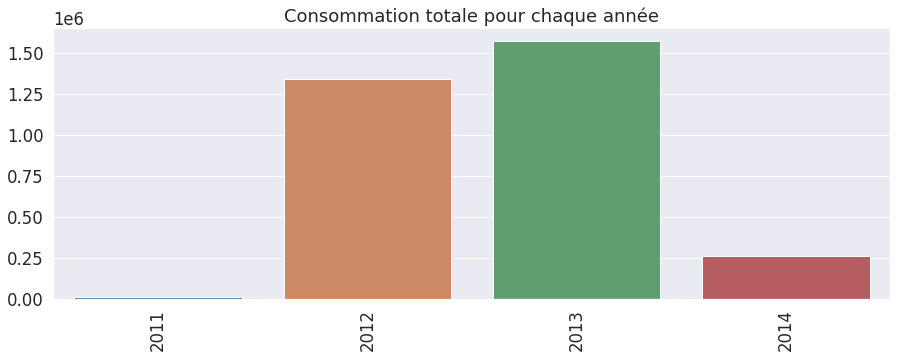

In [ ]:
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
years=[2011,2012,2013,2014]
g=sns.barplot(y=conso_totale,x=years)
g=g.set_xticklabels(g.get_xticklabels(), rotation=90) 
plt.title('Consommation totale pour chaque année')

Total consumption is greater in 2012 and 2013.

This is a normal result since the number of meters is greater in these two years

In [ ]:
conso_total_2011.describe()

count    133.000000
mean     111.563827
std       98.730219
min        7.067000
25%       40.239000
50%       89.195000
75%      146.024000
max      643.973999
Name: KWH/hh (per half hour) , dtype: float64

- For the year 2011, we have only one month which is December, for this month we have 133 meters, the average of total consumption of all meters is 111.51, the maximum of total consumption per meter is 643.97 and the minimum of total consumption per meter is 7.067.


We start by seeing the total consumption for the year 2011 per meter

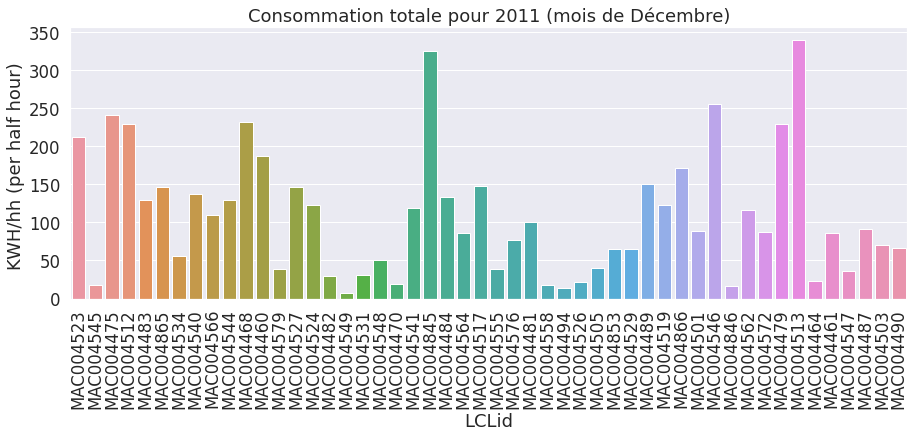

In [ ]:
#Since we have 133 meters, the visualization will not be understandable enough, so we will visualize a sample of 50 meters
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
conso_total_2011_sample=conso_total_2011.sample(50)
g=sns.barplot(y=conso_total_2011_sample,x=conso_moy_2011_sample.index)
plt.title('Consommation totale pour 2011 (mois de Décembre)')
g=g.set_xticklabels(g.get_xticklabels(), rotation=90) 

In [ ]:
df1_compteur=pd.DataFrame()
df1_compteur['Compteur']=conso_total_2011.index
df1_compteur['consommation_total_2011']=conso_total_2011.values
df_compteur=pd.merge(df_compteur,df1_compteur,on='Compteur',how='outer')
df_compteur['consommation_total_2011']=df_compteur['consommation_total_2011'].fillna(0)
df_compteur

,Compteur,consommation_moyenne_2011,consommation_moyenne_2012,consommation_moyenne_2013,consommation_moyenne_2014,consommation_moyenne_par_an,moyenne_consommation_par_mois,moyenne_conso_lundi_janiver_2012,moyenne_conso_dimanche_janiver_2012,conso_moy_Periode1,conso_moy_Periode2,conso_moy_Periode3,conso_moy_Periode4,conso_moy_Autumn,conso_moy_Spring,conso_moy_Summer,conso_moy_Winter,consommation_total_2011
0,MAC004459,0.456473,0.411864,0.379895,0.428417,0.395879,0.412145,0.556617,0.497254,0.221389,0.334494,0.494748,0.546930,0.383374,0.400106,0.329724,0.460793,339.616
1,MAC004460,0.330258,0.228031,0.214951,0.196139,0.221491,0.227949,0.252537,0.264029,0.103879,0.250059,0.255114,0.277431,0.220799,0.219639,0.214632,0.228804,231.841
2,MAC004461,0.097312,0.105042,0.097221,0.144438,0.101131,0.105048,0.090667,0.133404,0.062553,0.127554,0.115925,0.110709,0.111578,0.091904,0.105073,0.107170,68.313
3,MAC004462,0.237251,0.236806,0.250876,0.316051,0.243841,0.237240,0.272400,0.223492,0.142563,0.247210,0.346367,0.259454,0.246350,0.244691,0.203944,0.286470,166.550
4,MAC004463,0.145408,0.216300,0.217657,0.250558,0.216979,0.216260,0.209654,0.246617,0.139570,0.164223,0.249093,0.319391,0.197899,0.219782,0.215560,0.233223,101.931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,MAC005002,0.000000,0.114711,0.168397,0.249779,0.141554,0.118111,0.000000,0.000000,0.043382,0.155282,0.192904,0.211161,0.148538,0.130358,0.121698,0.195276,0.000
444,MAC005003,0.000000,0.104788,0.121901,0.136524,0.113345,0.105798,0.000000,0.000000,0.070059,0.096543,0.105971,0.188936,0.127307,0.104997,0.092106,0.134386,0.000
445,MAC005004,0.000000,0.068051,0.061210,0.074506,0.064631,0.068431,0.000000,0.000000,0.042066,0.068028,0.048470,0.102463,0.067187,0.062779,0.060686,0.069752,0.000
446,MAC005005,0.000000,0.150806,0.150928,0.174480,0.150867,0.157344,0.000000,0.000000,0.074718,0.143428,0.145763,0.246650,0.148561,0.150824,0.124744,0.182083,0.000






- Average consumption per meter in 2012




In [ ]:
conso_total_2012.describe()

count      448.000000
mean      2986.813616
std       2336.845063
min          0.028000
25%       1430.334500
50%       2336.463001
75%       3937.618750
max      22431.824011
Name: KWH/hh (per half hour) , dtype: float64

- For the year 2012,we have 448 meters, the average of total consumption of all meters is 2986.813, the maximum of total consumption per meter is 22431.82 and the minimum of total consumption per meter is 0.028.


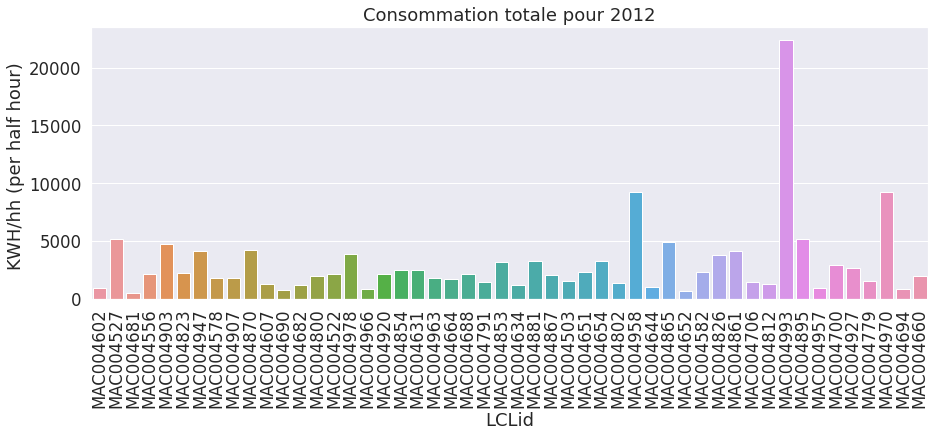

In [ ]:
#Since we have 448 meters, the visualization will not be understandable enough, so we will visualize a sample of 50 meters
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
conso_total_2012_sample=conso_total_2012.sample(50)
g=sns.barplot(y=conso_total_2012_sample,x=conso_total_2012_sample.index)
plt.title('Consommation totale pour 2012')

g=g.set_xticklabels(g.get_xticklabels(), rotation=90) 

In [ ]:
df1_compteur=pd.DataFrame()
df1_compteur['Compteur']=conso_total_2012.index
df_compteur['consommation_total_2012']=conso_total_2012.values

df_compteur=pd.merge(df_compteur,df1_compteur,on='Compteur',how='outer')
df_compteur['consommation_total_2012']=df_compteur['consommation_total_2012'].fillna(0)
df_compteur

,Compteur,consommation_moyenne_2011,consommation_moyenne_2012,consommation_moyenne_2013,consommation_moyenne_2014,consommation_moyenne_par_an,moyenne_consommation_par_mois,moyenne_conso_lundi_janiver_2012,moyenne_conso_dimanche_janiver_2012,conso_moy_Periode1,conso_moy_Periode2,conso_moy_Periode3,conso_moy_Periode4,conso_moy_Autumn,conso_moy_Spring,conso_moy_Summer,conso_moy_Winter,consommation_total_2011,consommation_total_2012
0,MAC004459,0.456473,0.411864,0.379895,0.428417,0.395879,0.412145,0.556617,0.497254,0.221389,0.334494,0.494748,0.546930,0.383374,0.400106,0.329724,0.460793,339.616,4191.299002
1,MAC004460,0.330258,0.228031,0.214951,0.196139,0.221491,0.227949,0.252537,0.264029,0.103879,0.250059,0.255114,0.277431,0.220799,0.219639,0.214632,0.228804,231.841,7233.574998
2,MAC004461,0.097312,0.105042,0.097221,0.144438,0.101131,0.105048,0.090667,0.133404,0.062553,0.127554,0.115925,0.110709,0.111578,0.091904,0.105073,0.107170,68.313,4005.823000
3,MAC004462,0.237251,0.236806,0.250876,0.316051,0.243841,0.237240,0.272400,0.223492,0.142563,0.247210,0.346367,0.259454,0.246350,0.244691,0.203944,0.286470,166.550,1845.272999
4,MAC004463,0.145408,0.216300,0.217657,0.250558,0.216979,0.216260,0.209654,0.246617,0.139570,0.164223,0.249093,0.319391,0.197899,0.219782,0.215560,0.233223,101.931,4159.967000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,MAC005002,0.000000,0.114711,0.168397,0.249779,0.141554,0.118111,0.000000,0.000000,0.043382,0.155282,0.192904,0.211161,0.148538,0.130358,0.121698,0.195276,0.000,1867.839000
444,MAC005003,0.000000,0.104788,0.121901,0.136524,0.113345,0.105798,0.000000,0.000000,0.070059,0.096543,0.105971,0.188936,0.127307,0.104997,0.092106,0.134386,0.000,1706.478000
445,MAC005004,0.000000,0.068051,0.061210,0.074506,0.064631,0.068431,0.000000,0.000000,0.042066,0.068028,0.048470,0.102463,0.067187,0.062779,0.060686,0.069752,0.000,1106.039000
446,MAC005005,0.000000,0.150806,0.150928,0.174480,0.150867,0.157344,0.000000,0.000000,0.074718,0.143428,0.145763,0.246650,0.148561,0.150824,0.124744,0.182083,0.000,2451.054000


- Total consumption per meter in 2013




In [ ]:
conso_total_2013.describe()

count      445.000000
mean      3538.958301
std       2522.578852
min          0.722000
25%       1811.775000
50%       2799.841000
75%       4569.785001
max      15672.575995
Name: KWH/hh (per half hour) , dtype: float64

- For the year 2013, we have 445 meters, the average of total consumption of all meters is 3538.958, the maximum of total consumption per meter is 15672.575 and the minimum of total consumption per meter is  0.722.



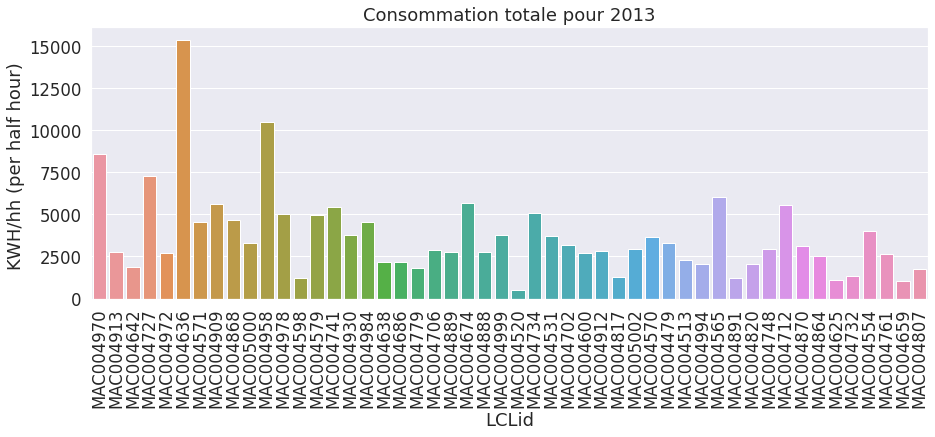

In [ ]:
#Since we have 445 meters, the visualization will not be understandable enough, so we will visualize a sample of 50 meters
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
conso_total_2013_sample=conso_total_2013.sample(50)
g=sns.barplot(y=conso_total_2013_sample,x=conso_total_2013_sample.index)
plt.title('Consommation totale pour 2013')

g=g.set_xticklabels(g.get_xticklabels(), rotation=90) 

In [ ]:
df1_compteur=pd.DataFrame()
df1_compteur['Compteur']=conso_moy_2013.index
df1_compteur['consommation_total_2013']=conso_total_2013.values

df_compteur=pd.merge(df_compteur,df1_compteur,on='Compteur',how='outer')
df_compteur['consommation_total_2013']=df_compteur['consommation_total_2013'].fillna(0)
df_compteur

,Compteur,consommation_moyenne_2011,consommation_moyenne_2012,consommation_moyenne_2013,consommation_moyenne_2014,consommation_moyenne_par_an,moyenne_consommation_par_mois,moyenne_conso_lundi_janiver_2012,moyenne_conso_dimanche_janiver_2012,conso_moy_Periode1,conso_moy_Periode2,conso_moy_Periode3,conso_moy_Periode4,conso_moy_Autumn,conso_moy_Spring,conso_moy_Summer,conso_moy_Winter,consommation_total_2011,consommation_total_2012,consommation_total_2013
0,MAC004459,0.456473,0.411864,0.379895,0.428417,0.395879,0.412145,0.556617,0.497254,0.221389,0.334494,0.494748,0.546930,0.383374,0.400106,0.329724,0.460793,339.616,4191.299002,6651.194001
1,MAC004460,0.330258,0.228031,0.214951,0.196139,0.221491,0.227949,0.252537,0.264029,0.103879,0.250059,0.255114,0.277431,0.220799,0.219639,0.214632,0.228804,231.841,7233.574998,3765.723999
2,MAC004461,0.097312,0.105042,0.097221,0.144438,0.101131,0.105048,0.090667,0.133404,0.062553,0.127554,0.115925,0.110709,0.111578,0.091904,0.105073,0.107170,68.313,4005.823000,1703.307000
3,MAC004462,0.237251,0.236806,0.250876,0.316051,0.243841,0.237240,0.272400,0.223492,0.142563,0.247210,0.346367,0.259454,0.246350,0.244691,0.203944,0.286470,166.550,1845.272999,4395.089998
4,MAC004463,0.145408,0.216300,0.217657,0.250558,0.216979,0.216260,0.209654,0.246617,0.139570,0.164223,0.249093,0.319391,0.197899,0.219782,0.215560,0.233223,101.931,4159.967000,3813.352000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,MAC005002,0.000000,0.114711,0.168397,0.249779,0.141554,0.118111,0.000000,0.000000,0.043382,0.155282,0.192904,0.211161,0.148538,0.130358,0.121698,0.195276,0.000,1867.839000,2950.311000
444,MAC005003,0.000000,0.104788,0.121901,0.136524,0.113345,0.105798,0.000000,0.000000,0.070059,0.096543,0.105971,0.188936,0.127307,0.104997,0.092106,0.134386,0.000,1706.478000,2135.700000
445,MAC005004,0.000000,0.068051,0.061210,0.074506,0.064631,0.068431,0.000000,0.000000,0.042066,0.068028,0.048470,0.102463,0.067187,0.062779,0.060686,0.069752,0.000,1106.039000,1072.401000
446,MAC005005,0.000000,0.150806,0.150928,0.174480,0.150867,0.157344,0.000000,0.000000,0.074718,0.143428,0.145763,0.246650,0.148561,0.150824,0.124744,0.182083,0.000,2451.054000,2643.956000


- Total consumption per meter in 2014




In [ ]:
conso_total_2014.describe()

count     407.000000
mean      649.993577
std       524.925525
min         0.000000
25%       316.032000
50%       500.081000
75%       781.303000
max      3562.681000
Name: KWH/hh (per half hour) , dtype: float64

- For the year 2014, we have 407 meters, the average of total consumption of all meters is 649.993, the maximum of total consumption per meter is 3562.681 and the minimum of total consumption per meter is  0.000.



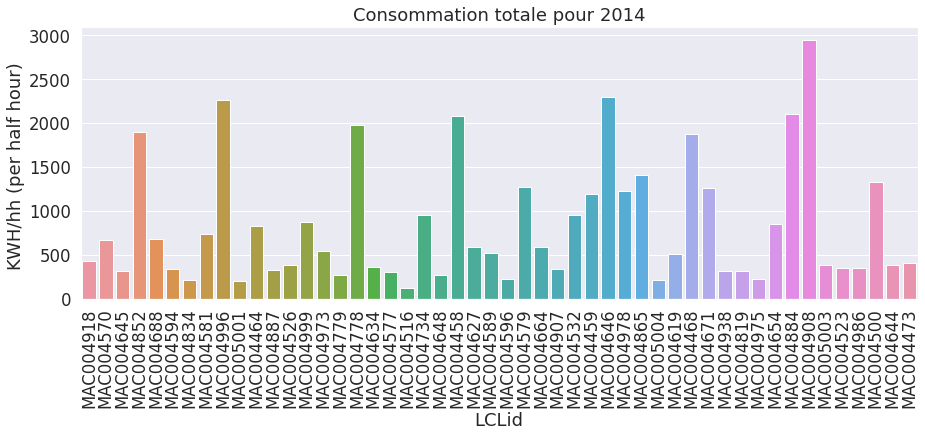

In [ ]:
#Since we have 407 meters, the visualization will not be understandable enough, so we will visualize a sample of 50 meters
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
conso_total_2014_sample=conso_total_2014.sample(50)
g=sns.barplot(y=conso_total_2014_sample,x=conso_total_2014_sample.index)
plt.title('Consommation totale pour 2014')

g=g.set_xticklabels(g.get_xticklabels(), rotation=90) 

In [ ]:
df1_compteur=pd.DataFrame()
df1_compteur['Compteur']=conso_moy_2014.index
df1_compteur['consommation_total_2014']=conso_total_2014.values

df_compteur=pd.merge(df_compteur,df1_compteur,on='Compteur',how='outer')
df_compteur['consommation_total_2014']=df_compteur['consommation_total_2014'].fillna(0)
df_compteur

,Compteur,consommation_moyenne_2011,consommation_moyenne_2012,consommation_moyenne_2013,consommation_moyenne_2014,consommation_moyenne_par_an,moyenne_consommation_par_mois,moyenne_conso_lundi_janiver_2012,moyenne_conso_dimanche_janiver_2012,conso_moy_Periode1,...,conso_moy_Periode3,conso_moy_Periode4,conso_moy_Autumn,conso_moy_Spring,conso_moy_Summer,conso_moy_Winter,consommation_total_2011,consommation_total_2012,consommation_total_2013,consommation_total_2014
0,MAC004459,0.456473,0.411864,0.379895,0.428417,0.395879,0.412145,0.556617,0.497254,0.221389,...,0.494748,0.546930,0.383374,0.400106,0.329724,0.460793,339.616,4191.299002,6651.194001,1192.284001
1,MAC004460,0.330258,0.228031,0.214951,0.196139,0.221491,0.227949,0.252537,0.264029,0.103879,...,0.255114,0.277431,0.220799,0.219639,0.214632,0.228804,231.841,7233.574998,3765.723999,546.248000
2,MAC004461,0.097312,0.105042,0.097221,0.144438,0.101131,0.105048,0.090667,0.133404,0.062553,...,0.115925,0.110709,0.111578,0.091904,0.105073,0.107170,68.313,4005.823000,1703.307000,402.261000
3,MAC004462,0.237251,0.236806,0.250876,0.316051,0.243841,0.237240,0.272400,0.223492,0.142563,...,0.346367,0.259454,0.246350,0.244691,0.203944,0.286470,166.550,1845.272999,4395.089998,879.886000
4,MAC004463,0.145408,0.216300,0.217657,0.250558,0.216979,0.216260,0.209654,0.246617,0.139570,...,0.249093,0.319391,0.197899,0.219782,0.215560,0.233223,101.931,4159.967000,3813.352000,697.803998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,MAC005002,0.000000,0.114711,0.168397,0.249779,0.141554,0.118111,0.000000,0.000000,0.043382,...,0.192904,0.211161,0.148538,0.130358,0.121698,0.195276,0.000,1867.839000,2950.311000,695.635000
444,MAC005003,0.000000,0.104788,0.121901,0.136524,0.113345,0.105798,0.000000,0.000000,0.070059,...,0.105971,0.188936,0.127307,0.104997,0.092106,0.134386,0.000,1706.478000,2135.700000,380.220000
445,MAC005004,0.000000,0.068051,0.061210,0.074506,0.064631,0.068431,0.000000,0.000000,0.042066,...,0.048470,0.102463,0.067187,0.062779,0.060686,0.069752,0.000,1106.039000,1072.401000,207.425000
446,MAC005005,0.000000,0.150806,0.150928,0.174480,0.150867,0.157344,0.000000,0.000000,0.074718,...,0.145763,0.246650,0.148561,0.150824,0.124744,0.182083,0.000,2451.054000,2643.956000,485.753001


In [ ]:
df_compteur['moyenne_de_consommation_total_par_an']=(df_compteur['consommation_total_2012']+df_compteur['consommation_total_2013'])/2

In [ ]:
df_compteur

,Compteur,consommation_moyenne_2011,consommation_moyenne_2012,consommation_moyenne_2013,consommation_moyenne_2014,consommation_moyenne_par_an,moyenne_consommation_par_mois,moyenne_conso_lundi_janiver_2012,moyenne_conso_dimanche_janiver_2012,conso_moy_Periode1,...,conso_moy_Periode4,conso_moy_Autumn,conso_moy_Spring,conso_moy_Summer,conso_moy_Winter,consommation_total_2011,consommation_total_2012,consommation_total_2013,consommation_total_2014,moyenne_de_consommation_total_par_an
0,MAC004459,0.456473,0.411864,0.379895,0.428417,0.395879,0.412145,0.556617,0.497254,0.221389,...,0.546930,0.383374,0.400106,0.329724,0.460793,339.616,4191.299002,6651.194001,1192.284001,5421.246502
1,MAC004460,0.330258,0.228031,0.214951,0.196139,0.221491,0.227949,0.252537,0.264029,0.103879,...,0.277431,0.220799,0.219639,0.214632,0.228804,231.841,7233.574998,3765.723999,546.248000,5499.649499
2,MAC004461,0.097312,0.105042,0.097221,0.144438,0.101131,0.105048,0.090667,0.133404,0.062553,...,0.110709,0.111578,0.091904,0.105073,0.107170,68.313,4005.823000,1703.307000,402.261000,2854.565000
3,MAC004462,0.237251,0.236806,0.250876,0.316051,0.243841,0.237240,0.272400,0.223492,0.142563,...,0.259454,0.246350,0.244691,0.203944,0.286470,166.550,1845.272999,4395.089998,879.886000,3120.181499
4,MAC004463,0.145408,0.216300,0.217657,0.250558,0.216979,0.216260,0.209654,0.246617,0.139570,...,0.319391,0.197899,0.219782,0.215560,0.233223,101.931,4159.967000,3813.352000,697.803998,3986.659500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,MAC005002,0.000000,0.114711,0.168397,0.249779,0.141554,0.118111,0.000000,0.000000,0.043382,...,0.211161,0.148538,0.130358,0.121698,0.195276,0.000,1867.839000,2950.311000,695.635000,2409.075000
444,MAC005003,0.000000,0.104788,0.121901,0.136524,0.113345,0.105798,0.000000,0.000000,0.070059,...,0.188936,0.127307,0.104997,0.092106,0.134386,0.000,1706.478000,2135.700000,380.220000,1921.089000
445,MAC005004,0.000000,0.068051,0.061210,0.074506,0.064631,0.068431,0.000000,0.000000,0.042066,...,0.102463,0.067187,0.062779,0.060686,0.069752,0.000,1106.039000,1072.401000,207.425000,1089.220000
446,MAC005005,0.000000,0.150806,0.150928,0.174480,0.150867,0.157344,0.000000,0.000000,0.074718,...,0.246650,0.148561,0.150824,0.124744,0.182083,0.000,2451.054000,2643.956000,485.753001,2547.505000


### Mois

In [ ]:
conso_total_2012_mois=df_2012.groupby(['LCLid','Month'])['KWH/hh (per half hour) '].sum()
conso_total_2013_mois=df_2013.groupby(['LCLid','Month'])['KWH/hh (per half hour) '].sum()
conso_total_2014_mois=df_2014.groupby(['LCLid','Month'])['KWH/hh (per half hour) '].sum()


-   January 2012



In [ ]:
m={1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[]}
for i,j in conso_total_2012_mois.index:
  m[j].append(i)
c_j=[]
for i in m[1]:
 c_j.append(conso_total_2012_mois[(i,1)])
cons_j=pd.DataFrame()
cons_j['Compteur']=m[1]
cons_j['consommation_total_janvier']=c_j
cons_j

,Compteur,consommation_total_janvier
0,MAC004459,737.266
1,MAC004460,340.618
2,MAC004461,148.778
3,MAC004462,363.413
4,MAC004463,331.514
...,...,...
245,MAC005002,34.334
246,MAC005003,24.434
247,MAC005004,12.661
248,MAC005005,41.419


- Total consumption per meter in January 2012








In [ ]:
cons_j.describe()

,consommation_total_janvier
count,250.000000
mean,285.034896
std,240.939690
min,9.341000
25%,112.135000
50%,216.110500
75%,396.052500
max,1342.245002


visualization of the the total consumption for January of the year 2012 


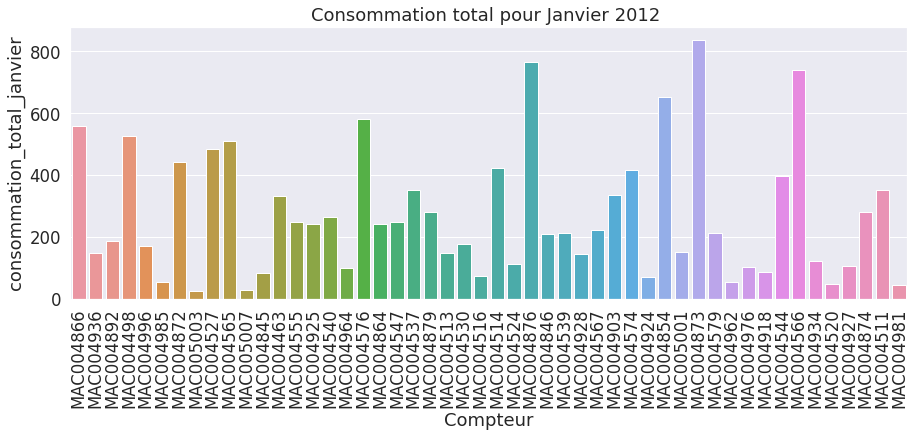

In [ ]:
#Since we have 250 meters, the visualization will not be understandable enough, so we will visualize a sample of 50 meters
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
cons_j_sample=cons_j.sample(50)
g=sns.barplot(y=cons_j_sample['consommation_total_janvier'],x=cons_j_sample['Compteur'])
plt.title('Consommation total pour Janvier 2012 ')

g=g.set_xticklabels(g.get_xticklabels(), rotation=90) 

- September 2012 

In [ ]:
c_s=[]
for i in m[9]:
 c_s.append(conso_total_2012_mois[(i,9)])
cons_s=pd.DataFrame()
cons_s['Compteur']=m[9]
cons_s['consommation_total_septembre']=c_s
cons_s

,Compteur,consommation_total_septembre
0,MAC004458,787.242999
1,MAC004459,480.706000
2,MAC004460,328.476000
3,MAC004461,159.442000
4,MAC004462,404.976000
...,...,...
442,MAC005001,686.456000
443,MAC005002,152.656000
444,MAC005003,134.525000
445,MAC005004,97.060000


In [ ]:
cons_s.describe()

,consommation_total_septembre
count,447.000000
mean,259.824796
std,180.715809
min,0.000000
25%,146.338000
50%,213.041000
75%,331.265000
max,1461.435002


description september

Visualization of the the total consumption for September of the year 2012 


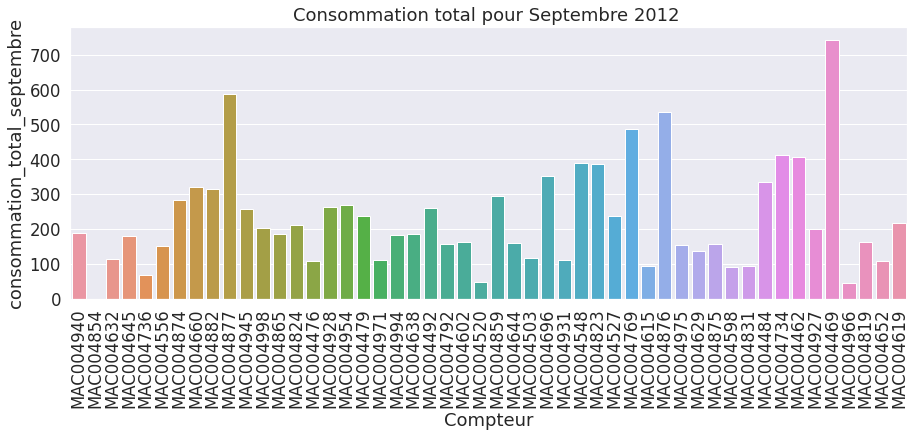

In [ ]:
#Since we have 447 meters, the visualization will not be understandable enough, so we will visualize a sample of 50 meters
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
cons_s_sample=cons_s.sample(50)
g=sns.barplot(y=cons_s_sample['consommation_total_septembre'],x=cons_s_sample['Compteur'])
plt.title('Consommation total pour Septembre 2012 ')

g=g.set_xticklabels(g.get_xticklabels(), rotation=90) 



- July 2012



In [ ]:
c_ju=[]
for i in m[7]:
 c_ju.append(conso_total_2012_mois[(i,7)])
cons_ju=pd.DataFrame()
cons_ju['Compteur']=m[7]
cons_ju['consommation_total_juillet']=c_ju
cons_ju

,Compteur,consommation_total_juillet
0,MAC004459,512.554
1,MAC004460,306.441
2,MAC004461,181.679
3,MAC004462,291.052
4,MAC004463,325.756
...,...,...
440,MAC005002,150.379
441,MAC005003,125.470
442,MAC005004,91.550
443,MAC005005,190.942


In [ ]:
cons_ju.describe()

,consommation_total_juillet
count,445.000000
mean,229.375508
std,150.070554
min,0.000000
25%,127.052000
50%,192.808000
75%,291.052000
max,996.632999


description mois juillet

Visualization of the the total consumption for July of the year 2012 


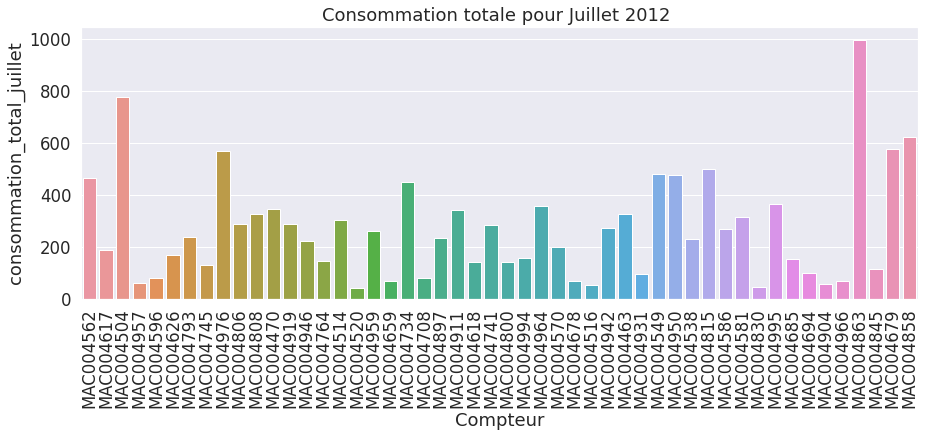

In [ ]:
#Since we have 445 meters, the visualization will not be understandable enough, so we will visualize a sample of 50 meters
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
cons_ju_sample=cons_ju.sample(50)
g=sns.barplot(y=cons_ju_sample['consommation_total_juillet'],x=cons_ju_sample['Compteur'])
plt.title('Consommation totale pour Juillet 2012 ')

g=g.set_xticklabels(g.get_xticklabels(), rotation=90) 

We need to calculate the total consumption of each meter per month  

In [ ]:
month_cons_tot=pd.DataFrame()
c_fe=[]
for i in m[1]:
  c_fe.append(conso_total_2012_mois[(i,1)])
cons_fe=pd.DataFrame()
cons_fe['Compteur']=m[1]
cons_fe['consommation_total_'+str(Month_Names[1])]=c_fe
month_cons_tot=cons_fe
for j in range(2,13):
 c_fe=[]
 for i in m[j]:
  c_fe.append(conso_total_2012_mois[(i,j)])
 cons_fe=pd.DataFrame()
 cons_fe['Compteur']=m[j]
 cons_fe['consommation_total_'+str(Month_Names[j])]=c_fe
 month_cons_tot=pd.merge(month_cons_tot,cons_fe,on='Compteur',how='outer')
month_cons_tot=month_cons.fillna(0)
month_cons_tot

,Compteur,consommation_moyenne_Janvier,consommation_moyenne_Février,consommation_moyenne_Mars,consommation_moyenne_Avril,consommation_moyenne_Mai,consommation_moyenne_Juin,consommation_moyenne_Juillet,consommation_moyenne_Aout,consommation_moyenne_Septembre,consommation_moyenne_Octobre,consommation_moyenne_Novembre,consommation_moyenne_Décembre,moyenne_consommation_par_mois
0,MAC004459,0.495474,0.522987,0.410585,0.395820,0.376232,0.325337,0.344458,0.341366,0.333824,0.399468,0.474856,0.525328,0.412145
1,MAC004460,0.228910,0.203455,0.236172,0.223215,0.237473,0.239029,0.205942,0.197867,0.228108,0.237296,0.240199,0.257722,0.227949
2,MAC004461,0.099985,0.101108,0.097470,0.107214,0.112614,0.117844,0.122096,0.099090,0.110724,0.103856,0.094628,0.093948,0.105048
3,MAC004462,0.244229,0.314658,0.202620,0.196283,0.214570,0.243696,0.195599,0.200635,0.281233,0.256558,0.232256,0.264540,0.237240
4,MAC004463,0.222792,0.231046,0.206265,0.217108,0.230835,0.216959,0.218922,0.213720,0.162801,0.224587,0.223956,0.226131,0.216260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,MAC004712,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.262368,0.402240,0.405245,0.457853,0.460576,0.519958,0.209020
444,MAC004973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099247,0.096250,0.079584,0.046629,0.033659,0.036858,0.032686
445,MAC004458,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.603970,0.546697,0.637046,0.738482,0.908771,0.286247
446,MAC004823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.243847,0.268801,0.316424,0.355140,0.353859,0.128173


Visualisation of the evolution of the total consumption of a random meter in 2012

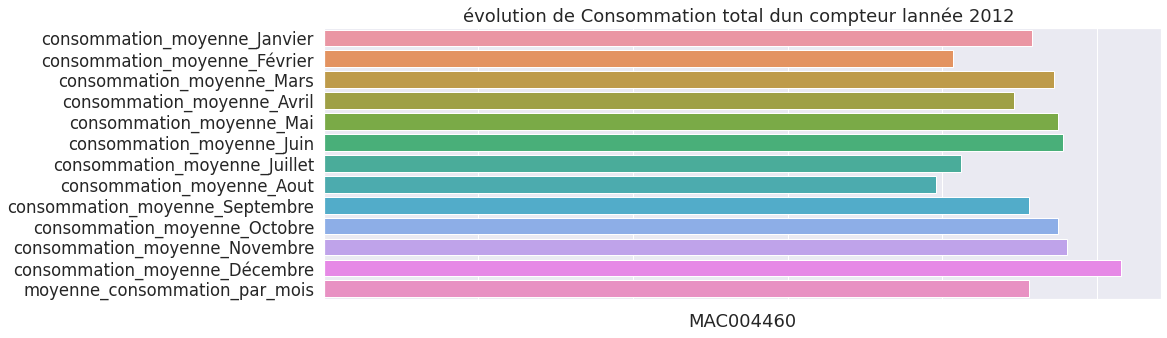

In [ ]:
pivoted = month_cons_tot.transpose()
pivoted = pivoted.rename(columns=month_cons_tot['Compteur'])
pivoted = pivoted.drop(pivoted.index[0])
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)

g=sns.barplot(y=pivoted[pivoted.columns[1]].index,x=pivoted[pivoted.columns[1]])
plt.title('évolution de Consommation total dun compteur lannée 2012 ')

g=g.set_xticklabels(g.get_xticklabels(), rotation=90) 


In [ ]:
month_cons_tot['moyenne_total_consommation_par_mois']=month_cons_tot.mean(axis=1)
month_cons_tot

<ipython-input-103-cbdf8b30d7f4>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  month_cons_tot['moyenne_total_consommation_par_mois']=month_cons_tot.mean(axis=1)


,Compteur,consommation_moyenne_Janvier,consommation_moyenne_Février,consommation_moyenne_Mars,consommation_moyenne_Avril,consommation_moyenne_Mai,consommation_moyenne_Juin,consommation_moyenne_Juillet,consommation_moyenne_Aout,consommation_moyenne_Septembre,consommation_moyenne_Octobre,consommation_moyenne_Novembre,consommation_moyenne_Décembre,moyenne_consommation_par_mois,moyenne_total_consommation_par_mois
0,MAC004459,0.495474,0.522987,0.410585,0.395820,0.376232,0.325337,0.344458,0.341366,0.333824,0.399468,0.474856,0.525328,0.412145,0.412145
1,MAC004460,0.228910,0.203455,0.236172,0.223215,0.237473,0.239029,0.205942,0.197867,0.228108,0.237296,0.240199,0.257722,0.227949,0.227949
2,MAC004461,0.099985,0.101108,0.097470,0.107214,0.112614,0.117844,0.122096,0.099090,0.110724,0.103856,0.094628,0.093948,0.105048,0.105048
3,MAC004462,0.244229,0.314658,0.202620,0.196283,0.214570,0.243696,0.195599,0.200635,0.281233,0.256558,0.232256,0.264540,0.237240,0.237240
4,MAC004463,0.222792,0.231046,0.206265,0.217108,0.230835,0.216959,0.218922,0.213720,0.162801,0.224587,0.223956,0.226131,0.216260,0.216260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,MAC004712,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.262368,0.402240,0.405245,0.457853,0.460576,0.519958,0.209020,0.209020
444,MAC004973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099247,0.096250,0.079584,0.046629,0.033659,0.036858,0.032686,0.032686
445,MAC004458,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.603970,0.546697,0.637046,0.738482,0.908771,0.286247,0.286247
446,MAC004823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.243847,0.268801,0.316424,0.355140,0.353859,0.128173,0.128173


In [ ]:
df_compteur=pd.merge(df_compteur,month_cons_tot[['Compteur','moyenne_total_consommation_par_mois']],on='Compteur',how='outer')
df_compteur

,Compteur,consommation_moyenne_2011,consommation_moyenne_2012,consommation_moyenne_2013,consommation_moyenne_2014,consommation_moyenne_par_an,moyenne_consommation_par_mois,moyenne_conso_lundi_janiver_2012,moyenne_conso_dimanche_janiver_2012,conso_moy_Periode1,...,conso_moy_Autumn,conso_moy_Spring,conso_moy_Summer,conso_moy_Winter,consommation_total_2011,consommation_total_2012,consommation_total_2013,consommation_total_2014,moyenne_de_consommation_total_par_an,moyenne_total_consommation_par_mois
0,MAC004459,0.456473,0.411864,0.379895,0.428417,0.395879,0.412145,0.556617,0.497254,0.221389,...,0.383374,0.400106,0.329724,0.460793,339.616,4191.299002,6651.194001,1192.284001,5421.246502,0.412145
1,MAC004460,0.330258,0.228031,0.214951,0.196139,0.221491,0.227949,0.252537,0.264029,0.103879,...,0.220799,0.219639,0.214632,0.228804,231.841,7233.574998,3765.723999,546.248000,5499.649499,0.227949
2,MAC004461,0.097312,0.105042,0.097221,0.144438,0.101131,0.105048,0.090667,0.133404,0.062553,...,0.111578,0.091904,0.105073,0.107170,68.313,4005.823000,1703.307000,402.261000,2854.565000,0.105048
3,MAC004462,0.237251,0.236806,0.250876,0.316051,0.243841,0.237240,0.272400,0.223492,0.142563,...,0.246350,0.244691,0.203944,0.286470,166.550,1845.272999,4395.089998,879.886000,3120.181499,0.237240
4,MAC004463,0.145408,0.216300,0.217657,0.250558,0.216979,0.216260,0.209654,0.246617,0.139570,...,0.197899,0.219782,0.215560,0.233223,101.931,4159.967000,3813.352000,697.803998,3986.659500,0.216260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,MAC005002,0.000000,0.114711,0.168397,0.249779,0.141554,0.118111,0.000000,0.000000,0.043382,...,0.148538,0.130358,0.121698,0.195276,0.000,1867.839000,2950.311000,695.635000,2409.075000,0.118111
444,MAC005003,0.000000,0.104788,0.121901,0.136524,0.113345,0.105798,0.000000,0.000000,0.070059,...,0.127307,0.104997,0.092106,0.134386,0.000,1706.478000,2135.700000,380.220000,1921.089000,0.105798
445,MAC005004,0.000000,0.068051,0.061210,0.074506,0.064631,0.068431,0.000000,0.000000,0.042066,...,0.067187,0.062779,0.060686,0.069752,0.000,1106.039000,1072.401000,207.425000,1089.220000,0.068431
446,MAC005005,0.000000,0.150806,0.150928,0.174480,0.150867,0.157344,0.000000,0.000000,0.074718,...,0.148561,0.150824,0.124744,0.182083,0.000,2451.054000,2643.956000,485.753001,2547.505000,0.157344


### Day

We are going to focus on the year 2012


In [ ]:
conso_moy_2012_mois=df_2012.groupby(['LCLid','Month'])['KWH/hh (per half hour) '].sum()


We start by January

In [ ]:
conso_by_2012_by_month_by_day=df_2012[df_2012['Month']==1].groupby(['Day','LCLid'])['KWH/hh (per half hour) '].sum()
conso_by_2012_by_month_by_day

Day  LCLid    
1    MAC004459     9.815
     MAC004460    12.790
     MAC004461     6.220
     MAC004462     9.792
     MAC004463     4.256
                   ...  
31   MAC005002     5.465
     MAC005003     4.552
     MAC005004     3.086
     MAC005005     6.418
     MAC005007     4.401
Name: KWH/hh (per half hour) , Length: 5635, dtype: float64

In [ ]:
from datetime import date
jo={1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[],13:[],14:[],15:[],16:[],17:[],18:[],19:[],20:[],21:[],22:[],23:[],24:[],25:[],26:[],27:[],28:[],29:[],30:[],31:[]}
daily_cons=pd.DataFrame()
c_fe=[]
jour_janv=[]
for i,j in conso_by_2012_by_month_by_day.index:
  jo[i].append(j)
  jour_janv.append(week_days[date(2012, 1, i).isoweekday()])
for i in jo[1]:
  c_fe.append(conso_by_2012_by_month_by_day[(1,i)])
cons_fe=pd.DataFrame()
cons_fe['Compteur']=jo[1]
cons_fe['consommation_total_jour_'+str(week_days[date(2012, 1, 1).isoweekday()])+str(1)]=c_fe
daily_cons=cons_fe
for j in range(2,32):
 c_fe=[]
 
 for i in jo[j]:
  c_fe.append(conso_by_2012_by_month_by_day[(j,i)])
 cons_fe=pd.DataFrame()
 cons_fe['Compteur']=jo[j]
 cons_fe['consommation_total_jour_'+str(week_days[date(2012, 1, j).isoweekday()])+str(j)]=c_fe
 daily_cons=pd.merge(daily_cons,cons_fe,on='Compteur',how='outer')
daily_cons


,Compteur,consommation_total_jour_Dimanche1,consommation_total_jour_Lundi2,consommation_total_jour_Mardi3,consommation_total_jour_Mercredi4,consommation_total_jour_Jeudi5,consommation_total_jour_Vendredi6,consommation_total_jour_Samedi7,consommation_total_jour_Dimanche8,consommation_total_jour_Lundi9,...,consommation_total_jour_Dimanche22,consommation_total_jour_Lundi23,consommation_total_jour_Mardi24,consommation_total_jour_Mercredi25,consommation_total_jour_Jeudi26,consommation_total_jour_Vendredi27,consommation_total_jour_Samedi28,consommation_total_jour_Dimanche29,consommation_total_jour_Lundi30,consommation_total_jour_Mardi31
0,MAC004459,9.815,25.663,21.995,23.786,25.907,20.367,14.979,21.797,33.664,...,25.883,15.408,22.972,18.960,25.324,18.411,18.690,32.581,22.117,28.666
1,MAC004460,12.790,15.565,14.077,9.332,10.507,8.496,8.988,16.722,11.519,...,13.070,9.036,10.990,9.004,10.665,8.881,12.001,10.409,11.513,9.225
2,MAC004461,6.220,4.726,4.151,3.774,3.807,3.618,4.151,5.603,4.138,...,7.591,4.119,4.681,5.233,5.176,4.002,4.406,6.358,4.442,4.366
3,MAC004462,9.792,10.809,9.544,9.999,10.959,17.461,11.061,9.327,9.878,...,10.567,10.278,9.211,12.793,12.429,8.942,10.913,12.623,25.159,32.255
4,MAC004463,4.256,6.158,20.099,8.491,8.327,8.086,10.545,15.388,15.566,...,14.779,12.523,16.923,13.162,7.640,8.772,8.268,9.540,7.473,8.638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,MAC005002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.249,12.302,5.021,7.297,5.465
246,MAC005003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.781,5.763,5.396,5.942,4.552
247,MAC005004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.162,2.740,2.673,3.086
248,MAC005005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.391,13.679,10.931,6.418


In [ ]:
daily_cons=daily_cons.fillna(0)
daily_cons['moyenne _consommation_total_par_jour_2012_Janvier']=daily_cons.mean(axis=1)
daily_cons

<ipython-input-108-81eb24aff677>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  daily_cons['moyenne _consommation_total_par_jour_2012_Janvier']=daily_cons.mean(axis=1)


,Compteur,consommation_total_jour_Dimanche1,consommation_total_jour_Lundi2,consommation_total_jour_Mardi3,consommation_total_jour_Mercredi4,consommation_total_jour_Jeudi5,consommation_total_jour_Vendredi6,consommation_total_jour_Samedi7,consommation_total_jour_Dimanche8,consommation_total_jour_Lundi9,...,consommation_total_jour_Lundi23,consommation_total_jour_Mardi24,consommation_total_jour_Mercredi25,consommation_total_jour_Jeudi26,consommation_total_jour_Vendredi27,consommation_total_jour_Samedi28,consommation_total_jour_Dimanche29,consommation_total_jour_Lundi30,consommation_total_jour_Mardi31,moyenne _consommation_total_par_jour_2012_Janvier
0,MAC004459,9.815,25.663,21.995,23.786,25.907,20.367,14.979,21.797,33.664,...,15.408,22.972,18.960,25.324,18.411,18.690,32.581,22.117,28.666,23.782774
1,MAC004460,12.790,15.565,14.077,9.332,10.507,8.496,8.988,16.722,11.519,...,9.036,10.990,9.004,10.665,8.881,12.001,10.409,11.513,9.225,10.987677
2,MAC004461,6.220,4.726,4.151,3.774,3.807,3.618,4.151,5.603,4.138,...,4.119,4.681,5.233,5.176,4.002,4.406,6.358,4.442,4.366,4.799290
3,MAC004462,9.792,10.809,9.544,9.999,10.959,17.461,11.061,9.327,9.878,...,10.278,9.211,12.793,12.429,8.942,10.913,12.623,25.159,32.255,11.723000
4,MAC004463,4.256,6.158,20.099,8.491,8.327,8.086,10.545,15.388,15.566,...,12.523,16.923,13.162,7.640,8.772,8.268,9.540,7.473,8.638,10.694000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,MAC005002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,4.249,12.302,5.021,7.297,5.465,1.107548
246,MAC005003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,2.781,5.763,5.396,5.942,4.552,0.788194
247,MAC005004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,4.162,2.740,2.673,3.086,0.408419
248,MAC005005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,10.391,13.679,10.931,6.418,1.336097


Visualisation of the evolution of the total consumption of a random meter in 2012 per week

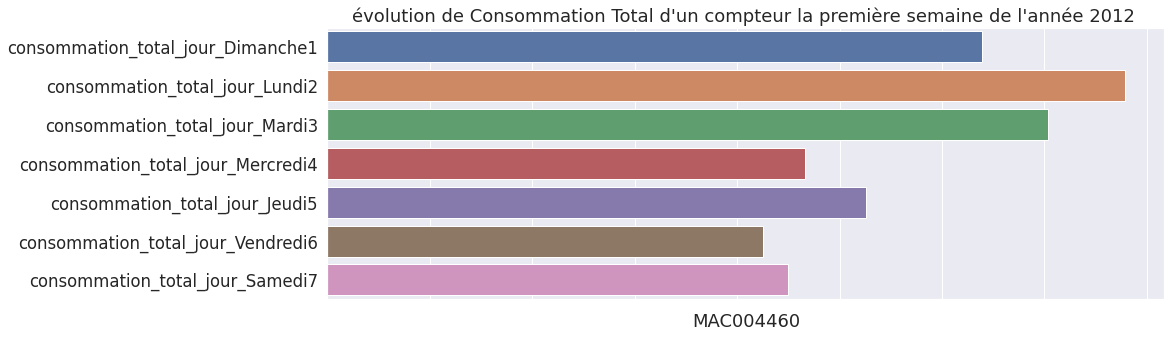

In [ ]:
pivoted = daily_cons.transpose()
pivoted = pivoted.rename(columns=month_cons['Compteur'])
pivoted = pivoted.drop(pivoted.index[0])
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
sem=pivoted[pivoted.columns[1]][:7]

g=sns.barplot(y=sem.index,x=pivoted[pivoted.columns[1]][:7])
plt.title('évolution de Consommation Total d\'un compteur la première semaine de l\'année 2012 ')

g=g.set_xticklabels(g.get_xticklabels(), rotation=90) 

For the meter 'MAC004460', the maximum of consumption is at Monday and the minimum consumption is at Friday

We calculate the total consumption for each day of January

Calculation of total consumption in January for a Sunday and for a Monday

In [ ]:
col_lun=[]
col_dim=[]
for i in daily_cons.columns:
  if 'Lundi' in i:
    col_lun.append(i)
  elif 'Dimanche' in i:
    col_dim.append(i)
daily_cons_lun=daily_cons[col_lun]
daily_cons_dim=daily_cons[col_dim]

In [ ]:
daily_cons['moyenne_conso_total_lundi_janiver_2012']=daily_cons_lun.mean(axis=1)
daily_cons['moyenne_conso_total_dimanche_janiver_2012']=daily_cons_dim.mean(axis=1)
daily_cons

,Compteur,consommation_total_jour_Dimanche1,consommation_total_jour_Lundi2,consommation_total_jour_Mardi3,consommation_total_jour_Mercredi4,consommation_total_jour_Jeudi5,consommation_total_jour_Vendredi6,consommation_total_jour_Samedi7,consommation_total_jour_Dimanche8,consommation_total_jour_Lundi9,...,consommation_total_jour_Mercredi25,consommation_total_jour_Jeudi26,consommation_total_jour_Vendredi27,consommation_total_jour_Samedi28,consommation_total_jour_Dimanche29,consommation_total_jour_Lundi30,consommation_total_jour_Mardi31,moyenne _consommation_total_par_jour_2012_Janvier,moyenne_conso_total_lundi_janiver_2012,moyenne_conso_total_dimanche_janiver_2012
0,MAC004459,9.815,25.663,21.995,23.786,25.907,20.367,14.979,21.797,33.664,...,18.960,25.324,18.411,18.690,32.581,22.117,28.666,23.782774,26.7176,23.8682
1,MAC004460,12.790,15.565,14.077,9.332,10.507,8.496,8.988,16.722,11.519,...,9.004,10.665,8.881,12.001,10.409,11.513,9.225,10.987677,12.1218,12.6734
2,MAC004461,6.220,4.726,4.151,3.774,3.807,3.618,4.151,5.603,4.138,...,5.233,5.176,4.002,4.406,6.358,4.442,4.366,4.799290,4.3520,6.4034
3,MAC004462,9.792,10.809,9.544,9.999,10.959,17.461,11.061,9.327,9.878,...,12.793,12.429,8.942,10.913,12.623,25.159,32.255,11.723000,13.0752,10.7276
4,MAC004463,4.256,6.158,20.099,8.491,8.327,8.086,10.545,15.388,15.566,...,13.162,7.640,8.772,8.268,9.540,7.473,8.638,10.694000,10.0634,11.8376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,MAC005002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,4.249,12.302,5.021,7.297,5.465,1.107548,1.4594,1.0042
246,MAC005003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,2.781,5.763,5.396,5.942,4.552,0.788194,1.1884,1.0792
247,MAC005004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,4.162,2.740,2.673,3.086,0.408419,0.5346,0.5480
248,MAC005005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,10.391,13.679,10.931,6.418,1.336097,2.1862,2.7358


In [ ]:
daily_cons['moyenne_conso_total_lundi_janiver_2012'].describe()

count    250.000000
mean       9.252057
std        7.852506
min        0.238200
25%        3.718300
50%        6.909200
75%       12.984800
max       42.111800
Name: moyenne_conso_total_lundi_janiver_2012, dtype: float64

For Mondays, the average consumption of all competitors is 0.195, the minimum average consumption is 0.004 and the maximum average consumption is 0.877.

In [ ]:
daily_cons['moyenne_conso_total_dimanche_janiver_2012'].describe()

count    250.000000
mean       9.421557
std        8.080516
min        0.269400
25%        3.682400
50%        7.094000
75%       12.559900
max       49.463400
Name: moyenne_conso_total_dimanche_janiver_2012, dtype: float64

For Sundays, the average consumption of all competitors is 9.42, the minimum total consumption is 0.269 and the maximum average consumption is 49.463.


The consumption has increased on Sundays in general and the maximum has passed from 42.111 on Mondays to 49.463 

In [ ]:
df_compteur['moyenne_conso_total_lundi_janiver_2012']=daily_cons['moyenne_conso_total_lundi_janiver_2012']
df_compteur['moyenne_conso_total_dimanche_janiver_2012']=daily_cons['moyenne_conso_total_dimanche_janiver_2012']
df_compteur=df_compteur.fillna(0)
df_compteur

,Compteur,consommation_moyenne_2011,consommation_moyenne_2012,consommation_moyenne_2013,consommation_moyenne_2014,consommation_moyenne_par_an,moyenne_consommation_par_mois,moyenne_conso_lundi_janiver_2012,moyenne_conso_dimanche_janiver_2012,conso_moy_Periode1,...,conso_moy_Summer,conso_moy_Winter,consommation_total_2011,consommation_total_2012,consommation_total_2013,consommation_total_2014,moyenne_de_consommation_total_par_an,moyenne_total_consommation_par_mois,moyenne_conso_total_lundi_janiver_2012,moyenne_conso_total_dimanche_janiver_2012
0,MAC004459,0.456473,0.411864,0.379895,0.428417,0.395879,0.412145,0.556617,0.497254,0.221389,...,0.329724,0.460793,339.616,4191.299002,6651.194001,1192.284001,5421.246502,0.412145,26.7176,23.8682
1,MAC004460,0.330258,0.228031,0.214951,0.196139,0.221491,0.227949,0.252537,0.264029,0.103879,...,0.214632,0.228804,231.841,7233.574998,3765.723999,546.248000,5499.649499,0.227949,12.1218,12.6734
2,MAC004461,0.097312,0.105042,0.097221,0.144438,0.101131,0.105048,0.090667,0.133404,0.062553,...,0.105073,0.107170,68.313,4005.823000,1703.307000,402.261000,2854.565000,0.105048,4.3520,6.4034
3,MAC004462,0.237251,0.236806,0.250876,0.316051,0.243841,0.237240,0.272400,0.223492,0.142563,...,0.203944,0.286470,166.550,1845.272999,4395.089998,879.886000,3120.181499,0.237240,13.0752,10.7276
4,MAC004463,0.145408,0.216300,0.217657,0.250558,0.216979,0.216260,0.209654,0.246617,0.139570,...,0.215560,0.233223,101.931,4159.967000,3813.352000,697.803998,3986.659500,0.216260,10.0634,11.8376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,MAC005002,0.000000,0.114711,0.168397,0.249779,0.141554,0.118111,0.000000,0.000000,0.043382,...,0.121698,0.195276,0.000,1867.839000,2950.311000,695.635000,2409.075000,0.118111,0.0000,0.0000
444,MAC005003,0.000000,0.104788,0.121901,0.136524,0.113345,0.105798,0.000000,0.000000,0.070059,...,0.092106,0.134386,0.000,1706.478000,2135.700000,380.220000,1921.089000,0.105798,0.0000,0.0000
445,MAC005004,0.000000,0.068051,0.061210,0.074506,0.064631,0.068431,0.000000,0.000000,0.042066,...,0.060686,0.069752,0.000,1106.039000,1072.401000,207.425000,1089.220000,0.068431,0.0000,0.0000
446,MAC005005,0.000000,0.150806,0.150928,0.174480,0.150867,0.157344,0.000000,0.000000,0.074718,...,0.124744,0.182083,0.000,2451.054000,2643.956000,485.753001,2547.505000,0.157344,0.0000,0.0000


### Seasons and periods of the day


In [ ]:
total_conso_period = df2.groupby(['LCLid', 'period']).agg({'KWH/hh (per half hour) ': ['sum']}).unstack()
reset_indx1 = total_conso_period.reset_index(level='LCLid')
reset_indx1.rename(columns = {'LCLid':'Compteur'}, inplace = True)
reset_indx1

Compteur KWH/hh (per half hour)                             \
                                      sum                             
period                            Period1      Period2      Period3   
0       MAC004458             1820.894998  2380.354001  6768.466003   
1       MAC004459             2135.735000  3226.863999  4777.285002   
2       MAC004460             1001.084999  2410.819000  2461.081000   
3       MAC004461              602.827000  1229.880000  1118.330999   
4       MAC004462             1373.879000  2383.354000  3341.051999   
..            ...                     ...          ...          ...   
443     MAC005002              396.681000  1419.894999  1764.877000   
444     MAC005003              640.686000   882.788000   969.215000   
445     MAC005004              384.144000   621.643000   443.158000   
446     MAC005005              682.327000  1310.506000  1332.563000   
447     MAC005007              106.542000   140.621000   156.348000   

                     
                     
period      Period4  
0       6568.598001  
1       5276.784998  
2       2676.650999  
3       1068.116000  
4       2503.208000  
..              ...  
443     1932.332001  
444     1729.709000  
445      936.920000  
446     2255.367001  
447      392.821000  

[448 rows x 5 columns]

In [ ]:
conso_tot_period1=pd.DataFrame()
conso_tot_period2=pd.DataFrame()
conso_tot_period3=pd.DataFrame()
conso_tot_period4=pd.DataFrame()
for i in reset_indx1:
  for j in i:
    if j == 'Period1':
          
      conso_tot_period1['conso_tot_Periode1']=reset_indx1[i]
      conso_tot_period1.set_index(reset_indx1['Compteur'], inplace=True)
    if j == 'Period2':
      conso_tot_period2['conso_tot_Periode2']=reset_indx1[i]
      conso_tot_period2.set_index(reset_indx1['Compteur'], inplace=True)

    if j == 'Period3':
      conso_tot_period3['conso_tot_Periode3']=reset_indx1[i]
      conso_tot_period3.set_index(reset_indx1['Compteur'], inplace=True)    
    if j == 'Period4':
     conso_tot_period4['conso_tot_Periode4']=reset_indx1[i]
     conso_tot_period4.set_index(reset_indx1['Compteur'], inplace=True)


In [ ]:
df_compteur=pd.merge(df_compteur,conso_tot_period1,on='Compteur', how='outer')
df_compteur=pd.merge(df_compteur,conso_tot_period2,on='Compteur', how='outer')
df_compteur=pd.merge(df_compteur,conso_tot_period3,on='Compteur', how='outer')
df_compteur=pd.merge(df_compteur,conso_tot_period4,on='Compteur', how='outer')
df_compteur=df_compteur.fillna(0)
df_compteur

,Compteur,consommation_moyenne_2011,consommation_moyenne_2012,consommation_moyenne_2013,consommation_moyenne_2014,consommation_moyenne_par_an,moyenne_consommation_par_mois,moyenne_conso_lundi_janiver_2012,moyenne_conso_dimanche_janiver_2012,conso_moy_Periode1,...,consommation_total_2013,consommation_total_2014,moyenne_de_consommation_total_par_an,moyenne_total_consommation_par_mois,moyenne_conso_total_lundi_janiver_2012,moyenne_conso_total_dimanche_janiver_2012,conso_tot_Periode1,conso_tot_Periode2,conso_tot_Periode3,conso_tot_Periode4
0,MAC004459,0.456473,0.411864,0.379895,0.428417,0.395879,0.412145,0.556617,0.497254,0.221389,...,6651.194001,1192.284001,5421.246502,0.412145,26.7176,23.8682,2135.735000,3226.863999,4777.285002,5276.784998
1,MAC004460,0.330258,0.228031,0.214951,0.196139,0.221491,0.227949,0.252537,0.264029,0.103879,...,3765.723999,546.248000,5499.649499,0.227949,12.1218,12.6734,1001.084999,2410.819000,2461.081000,2676.650999
2,MAC004461,0.097312,0.105042,0.097221,0.144438,0.101131,0.105048,0.090667,0.133404,0.062553,...,1703.307000,402.261000,2854.565000,0.105048,4.3520,6.4034,602.827000,1229.880000,1118.330999,1068.116000
3,MAC004462,0.237251,0.236806,0.250876,0.316051,0.243841,0.237240,0.272400,0.223492,0.142563,...,4395.089998,879.886000,3120.181499,0.237240,13.0752,10.7276,1373.879000,2383.354000,3341.051999,2503.208000
4,MAC004463,0.145408,0.216300,0.217657,0.250558,0.216979,0.216260,0.209654,0.246617,0.139570,...,3813.352000,697.803998,3986.659500,0.216260,10.0634,11.8376,1345.039000,1583.273000,2403.249999,3081.486000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,MAC005002,0.000000,0.114711,0.168397,0.249779,0.141554,0.118111,0.000000,0.000000,0.043382,...,2950.311000,695.635000,2409.075000,0.118111,0.0000,0.0000,396.681000,1419.894999,1764.877000,1932.332001
444,MAC005003,0.000000,0.104788,0.121901,0.136524,0.113345,0.105798,0.000000,0.000000,0.070059,...,2135.700000,380.220000,1921.089000,0.105798,0.0000,0.0000,640.686000,882.788000,969.215000,1729.709000
445,MAC005004,0.000000,0.068051,0.061210,0.074506,0.064631,0.068431,0.000000,0.000000,0.042066,...,1072.401000,207.425000,1089.220000,0.068431,0.0000,0.0000,384.144000,621.643000,443.158000,936.920000
446,MAC005005,0.000000,0.150806,0.150928,0.174480,0.150867,0.157344,0.000000,0.000000,0.074718,...,2643.956000,485.753001,2547.505000,0.157344,0.0000,0.0000,682.327000,1310.506000,1332.563000,2255.367001


In [ ]:
tot_conso_season = df2.groupby(['LCLid', 'season']).agg({'KWH/hh (per half hour) ': ['sum']}).unstack()
reset_indx1 = tot_conso_season.reset_index(level='LCLid')
reset_indx1.rename(columns = {'LCLid':'Compteur'}, inplace = True)
reset_indx1

Compteur KWH/hh (per half hour)                             \
                                      sum                             
season                             Autumn       Spring       Summer   
0       MAC004458             5487.756003  2756.108001  2414.796998   
1       MAC004459             3348.389000  3529.738999  2911.795000   
2       MAC004460             1928.677000  1939.635000  1895.634000   
3       MAC004461              974.748000   811.601000   928.005000   
4       MAC004462             2152.115999  2160.867000  1801.026000   
..            ...                     ...          ...          ...   
443     MAC005002             1297.483000  1150.544000  1074.719000   
444     MAC005003             1112.151000   927.330000   813.390000   
445     MAC005004              586.944000   554.402000   535.981000   
446     MAC005005             1297.676000  1331.923000  1101.743000   
447     MAC005007                     NaN   399.216000   181.806000   

                     
                     
season       Winter  
0       6879.652001  
1       5626.746001  
2       2785.689999  
3       1304.800000  
4       3487.483999  
..              ...  
443     1991.039000  
444     1369.527000  
445      708.538000  
446     1849.421001  
447      215.310000  

[448 rows x 5 columns]

In [ ]:
conso_tot_saison1=pd.DataFrame()
conso_tot_saison2=pd.DataFrame()
conso_tot_saison3=pd.DataFrame()
conso_tot_saison4=pd.DataFrame()
for i in reset_indx1:
  for j in i:
    if j == 'Autumn':
          
      conso_tot_saison1['conso_tot_Autumn']=reset_indx1[i]
      conso_tot_saison1.set_index(reset_indx1['Compteur'], inplace=True)
    if j == 'Spring':
      conso_tot_saison2['conso_tot_Spring']=reset_indx1[i]
      conso_tot_saison2.set_index(reset_indx1['Compteur'], inplace=True)

    if j == 'Summer':
      conso_tot_saison3['conso_tot_Summer']=reset_indx1[i]
      conso_tot_saison3.set_index(reset_indx1['Compteur'], inplace=True)    
    if j == 'Winter':
      conso_tot_saison4['conso_tot_Winter']=reset_indx1[i]
      conso_tot_saison4.set_index(reset_indx1['Compteur'], inplace=True)
df_compteur=pd.merge(df_compteur,conso_tot_saison1,on='Compteur', how='outer')
df_compteur=pd.merge(df_compteur,conso_tot_saison2,on='Compteur', how='outer')
df_compteur=pd.merge(df_compteur,conso_tot_saison3,on='Compteur', how='outer')
df_compteur=pd.merge(df_compteur,conso_tot_saison4,on='Compteur', how='outer')
df_compteur=df_compteur.fillna(0)
df_compteur

,Compteur,consommation_moyenne_2011,consommation_moyenne_2012,consommation_moyenne_2013,consommation_moyenne_2014,consommation_moyenne_par_an,moyenne_consommation_par_mois,moyenne_conso_lundi_janiver_2012,moyenne_conso_dimanche_janiver_2012,conso_moy_Periode1,...,moyenne_conso_total_lundi_janiver_2012,moyenne_conso_total_dimanche_janiver_2012,conso_tot_Periode1,conso_tot_Periode2,conso_tot_Periode3,conso_tot_Periode4,conso_tot_Autumn,conso_tot_Spring,conso_tot_Summer,conso_tot_Winter
0,MAC004459,0.456473,0.411864,0.379895,0.428417,0.395879,0.412145,0.556617,0.497254,0.221389,...,26.7176,23.8682,2135.735000,3226.863999,4777.285002,5276.784998,3348.389000,3529.738999,2911.795,5626.746001
1,MAC004460,0.330258,0.228031,0.214951,0.196139,0.221491,0.227949,0.252537,0.264029,0.103879,...,12.1218,12.6734,1001.084999,2410.819000,2461.081000,2676.650999,1928.677000,1939.635000,1895.634,2785.689999
2,MAC004461,0.097312,0.105042,0.097221,0.144438,0.101131,0.105048,0.090667,0.133404,0.062553,...,4.3520,6.4034,602.827000,1229.880000,1118.330999,1068.116000,974.748000,811.601000,928.005,1304.800000
3,MAC004462,0.237251,0.236806,0.250876,0.316051,0.243841,0.237240,0.272400,0.223492,0.142563,...,13.0752,10.7276,1373.879000,2383.354000,3341.051999,2503.208000,2152.115999,2160.867000,1801.026,3487.483999
4,MAC004463,0.145408,0.216300,0.217657,0.250558,0.216979,0.216260,0.209654,0.246617,0.139570,...,10.0634,11.8376,1345.039000,1583.273000,2403.249999,3081.486000,1728.842000,1941.119000,1903.827,2839.259998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,MAC005002,0.000000,0.114711,0.168397,0.249779,0.141554,0.118111,0.000000,0.000000,0.043382,...,0.0000,0.0000,396.681000,1419.894999,1764.877000,1932.332001,1297.483000,1150.544000,1074.719,1991.039000
444,MAC005003,0.000000,0.104788,0.121901,0.136524,0.113345,0.105798,0.000000,0.000000,0.070059,...,0.0000,0.0000,640.686000,882.788000,969.215000,1729.709000,1112.151000,927.330000,813.390,1369.527000
445,MAC005004,0.000000,0.068051,0.061210,0.074506,0.064631,0.068431,0.000000,0.000000,0.042066,...,0.0000,0.0000,384.144000,621.643000,443.158000,936.920000,586.944000,554.402000,535.981,708.538000
446,MAC005005,0.000000,0.150806,0.150928,0.174480,0.150867,0.157344,0.000000,0.000000,0.074718,...,0.0000,0.0000,682.327000,1310.506000,1332.563000,2255.367001,1297.676000,1331.923000,1101.743,1849.421001


In [ ]:
df_compteur.to_csv('/content/drive/MyDrive/Smart_grid/Data_clustering.csv',index=False)
